In [1]:
import xarray as xr
import cartopy
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path


### Open files

In [2]:
file_path = Path("../../../output_data/040_connectivity_analysis_15m/")

In [3]:
ds_conn_07 = xr.open_dataset(str(file_path / "040_connectivity_analysis_15m_00-07days.nc"))

In [4]:
ds_conn_14 = xr.open_dataset(str(file_path / "040_connectivity_analysis_15m_07-14days.nc"))

In [5]:
ds_conn_28 = xr.open_dataset(str(file_path / "040_connectivity_analysis_15m_07-28days.nc"))

### Normalization

In [6]:
ds_conn_07["obs_per_origin_area"] = ds_conn_07.obs / ds_conn_07.water_fraction_hex0

In [7]:
ds_conn_14["obs_per_origin_area"] = ds_conn_14.obs / ds_conn_14.water_fraction_hex0

In [8]:
ds_conn_28["obs_per_origin_area"] = ds_conn_28.obs / ds_conn_28.water_fraction_hex0

### Labellig habitable zones
- depth < 90m, rest sites, aquaculture, historic sites, known disease sites, known healthy sites

In [9]:
ds_conn_07["habitable_hex0"] = (
    (ds_conn_07.depth_median_hex0 < 90)
    | (ds_conn_07.his_count_hex0 > 0)
    | (ds_conn_07.rst_count_hex0 > 0)
    | (ds_conn_07.aqc_count_hex0 > 0)
    | (ds_conn_07.dss_count_hex0 > 0)
    | (ds_conn_07.hly_count_hex0 > 0)
).rename("habitable_hex0")

ds_conn_07["habitable_hex1"] = (
    (ds_conn_07.depth_median_hex1 < 90)
    | (ds_conn_07.rst_count_hex1 > 0)
    | (ds_conn_07.his_count_hex1 > 0)
    | (ds_conn_07.aqc_count_hex1 > 0)
    | (ds_conn_07.dss_count_hex1 > 0)
    | (ds_conn_07.hly_count_hex1 > 0)
).rename("habitable_hex1")

In [10]:
ds_conn_14["habitable_hex0"] = (
    (ds_conn_14.depth_median_hex0 < 90)
    | (ds_conn_14.his_count_hex0 > 0)
    | (ds_conn_14.rst_count_hex0 > 0)
    | (ds_conn_14.aqc_count_hex0 > 0)
    | (ds_conn_14.dss_count_hex0 > 0)
    | (ds_conn_14.hly_count_hex0 > 0)
).rename("habitable_hex0")

ds_conn_14["habitable_hex1"] = (
    (ds_conn_14.depth_median_hex1 < 90)
    | (ds_conn_14.rst_count_hex1 > 0)
    | (ds_conn_14.his_count_hex1 > 0)
    | (ds_conn_14.aqc_count_hex1 > 0)
    | (ds_conn_14.dss_count_hex1 > 0)
    | (ds_conn_14.hly_count_hex1 > 0)
).rename("habitable_hex1")

In [11]:
ds_conn_28["habitable_hex0"] = (
    (ds_conn_28.depth_median_hex0 < 90)
    | (ds_conn_28.his_count_hex0 > 0)
    | (ds_conn_28.rst_count_hex0 > 0)
    | (ds_conn_28.aqc_count_hex0 > 0)
    | (ds_conn_28.dss_count_hex0 > 0)
    | (ds_conn_28.hly_count_hex0 > 0)
).rename("habitable_hex0")

ds_conn_28["habitable_hex1"] = (
    (ds_conn_28.depth_median_hex1 < 90)
    | (ds_conn_28.rst_count_hex1 > 0)
    | (ds_conn_28.his_count_hex1 > 0)
    | (ds_conn_28.aqc_count_hex1 > 0)
    | (ds_conn_28.dss_count_hex1 > 0)
    | (ds_conn_28.hly_count_hex1 > 0)
).rename("habitable_hex1")

In [12]:
habitable_to_habitable_01y_07 = ds_conn_07.obs_per_origin_area.where(
    (ds_conn_07.habitable_hex0 > 0)
    & (ds_conn_07.habitable_hex1 > 0)
)

In [13]:
habitable_to_habitable_01y_14 = ds_conn_14.obs_per_origin_area.where(
    (ds_conn_14.habitable_hex0 > 0)
    & (ds_conn_14.habitable_hex1 > 0)
)

In [14]:
habitable_to_habitable_01y_28 = ds_conn_28.obs_per_origin_area.where(
    (ds_conn_28.habitable_hex0 > 0)
    & (ds_conn_28.habitable_hex1 > 0)
)

### Diseased + aquaculture + historical to restoration AVERAGE 00-07

In [15]:
dssaqchis_to_rst_01y = ds_conn_07.obs_per_origin_area.where(
    (ds_conn_07.dss_count_hex0 > 0) | (ds_conn_07.his_count_hex0 > 0) | (ds_conn_07.aqc_count_hex0 > 0),
    drop=True,
).where(
    (ds_conn_07.rst_count_hex1 > 0)
)

dssaqchis_to_rst_01y

<xarray.DataArray 'obs_per_origin_area' (month: 5, year: 4, hex0: 306,
                                         hex1: 8282)> Size: 405MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * hex0       (hex0) <U47 58kB '(-1, -36, 37)' ... '(9, -58, 49)'
  * hex1       (hex1) <U47 2MB '(-1, -2, 3)' '(-1, -20, 21)' ... '(9, 9, -18)'
  * month      (month) float64 40B 0.0 1.0 2.0 3.0 4.0
  * year       (year) float64 32B 0.0 1.0 2.0 3.0
    lon_hex0   (hex0) float64 2kB -3.204 -3.199 nan ... -1.135 -1.141 -1.257
    lon_hex1   (hex1) float64 66kB -3.229 -3.215 -3.212 ... -0.8121 -0.8032
    lat_hex0   (hex0) float64 2kB 48.82 47.57 nan 58.78 ... 49.58 49.42 46.15
    lat_hex1   (hex1) float64 66kB 54.11 51.31 50.69 50.53 ... 56.27 56.43 56.58
    hex_label  (hex0) <U14 17kB '(-1, -36, 37)' ... '(9, -58, 49)'

In [16]:
known_rst_sites = ds_conn_07.rst_count_hex0.where(ds_conn_07.rst_count_hex0 > 0).to_dataset().to_pandas().dropna()
known_rst_sites

lon_hex0   lat_hex0       hex_label  rst_count_hex0
hex0                                                               
(-11, 16, -5)  -5.652154  56.105601   (-11, 16, -5)             1.0
(-11, 17, -6)  -5.662842  56.261053   (-11, 17, -6)             1.0
(-11, 7, 4)    -5.560333  54.706424     (-11, 7, 4)             1.0
(-14, -4, 18)  -6.110616  52.746676   (-14, -4, 18)             1.0
(-27, 6, 21)   -9.065311  53.176870    (-27, 6, 21)             1.0
(-4, 24, -20)  -4.011904  57.918896   (-4, 24, -20)             1.0
(-8, 11, -3)   -4.902596  55.574491    (-8, 11, -3)             1.0
(-9, -34, 43)  -4.824256  48.488479   (-9, -34, 43)             2.0
(0, -45, 45)   -3.000000  47.489861    (0, -45, 45)             1.0
(12, -39, 27)  -0.525187  49.333480   (12, -39, 27)             1.0
(27, -31, 4)    2.854403  51.626277    (27, -31, 4)             2.0
(28, -31, 3)    3.080785  51.692529    (28, -31, 3)             1.0
(31, -31, 0)    3.764009  51.888537    (31, -31, 0)             1.0
(32, -28, -4)   4.067194  52.417435   (32, -28, -4)             1.0
(35, -24, -11)  4.878878  53.225639  (35, -24, -11)             1.0
(39, -21, -18)  5.933679  53.933641  (39, -21, -18)             1.0
(40, -21, -19)  6.177440  53.993490  (40, -21, -19)             1.0
(42, -23, -19)  6.595486  53.803701  (42, -23, -19)             1.0
(42, -24, -18)  6.560140  53.649690  (42, -24, -18)             1.0
(45, -5, -40)   8.080625  56.741595   (45, -5, -40)             1.0
(47, -22, -25)  7.862873  54.244597  (47, -22, -25)             1.0
(5, -27, 22)   -1.939319  50.680946    (5, -27, 22)             1.0
(5, -40, 35)   -1.983200  48.655073    (5, -40, 35)             1.0
(7, -1, -6)    -1.364036  54.877988     (7, -1, -6)             1.0
(7, -34, 27)   -1.544287  49.741493    (7, -34, 27)             1.0
(9, -58, 49)   -1.256751  46.148070    (9, -58, 49)             1.0

In [17]:
dssaqchis_origins_01y = dssaqchis_to_rst_01y.sum(["month", "year", "hex1"]).compute().to_dataset().to_pandas()
dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] > 0).dropna()

lon_hex0   lat_hex0      hex_label  obs_per_origin_area
hex0                                                                  
(-10, 13, -3) -5.387340  55.721769  (-10, 13, -3)          3692.105263
(-11, 15, -4) -5.641567  55.950147  (-11, 15, -4)           361.064516
(-11, 16, -5) -5.652154  56.105601  (-11, 16, -5)           290.804348
(-11, 17, -6) -5.662842  56.261053  (-11, 17, -6)         10745.375000
(-11, 6, 5)   -5.550592  54.550942    (-11, 6, 5)           734.967742
...                 ...        ...            ...                  ...
(6, -40, 34)  -1.777946  48.730928   (6, -40, 34)             8.216216
(7, -34, 27)  -1.544287  49.741493   (7, -34, 27)         92501.842105
(9, -35, 26)  -1.128520  49.735222   (9, -35, 26)         16044.000000
(9, -36, 27)  -1.134589  49.579428   (9, -36, 27)          3128.160000
(9, -58, 49)  -1.256751  46.148070   (9, -58, 49)           337.250000

[64 rows x 4 columns]

In [18]:
dssaqchis_destinations_01y = dssaqchis_to_rst_01y.sum(["month", "year", "hex0"]).compute().to_dataset().to_pandas()
dssaqchis_destinations_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                  0.0
(-1, -20, 21) -3.215043  51.308774                  0.0
(-1, -24, 25) -3.212150  50.685757                  0.0
(-1, -25, 26) -3.211441  50.529976                  0.0
(-1, -26, 27) -3.210739  50.374185                  0.0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                  0.0
(9, 6, -15)   -0.829731  56.114857                  0.0
(9, 7, -16)   -0.820982  56.270351                  0.0
(9, 8, -17)   -0.812150  56.425843                  0.0
(9, 9, -18)   -0.803232  56.581335                  0.0

[8282 rows x 3 columns]

In [19]:
dssaqchis_origin_count_01y = (dssaqchis_to_rst_01y.sum(["month", "year"]) > 0).sum("hex0").compute().to_dataset().to_pandas()
dssaqchis_origin_count_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                    0
(-1, -20, 21) -3.215043  51.308774                    0
(-1, -24, 25) -3.212150  50.685757                    0
(-1, -25, 26) -3.211441  50.529976                    0
(-1, -26, 27) -3.210739  50.374185                    0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                    0
(9, 6, -15)   -0.829731  56.114857                    0
(9, 7, -16)   -0.820982  56.270351                    0
(9, 8, -17)   -0.812150  56.425843                    0
(9, 9, -18)   -0.803232  56.581335                    0

[8282 rows x 3 columns]

In [20]:
dssaqchis_to_rst_stats = (
    dssaqchis_origin_count_01y
    .where(dssaqchis_origin_count_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"lon_hex1": "lon", "lat_hex1": "lat", "obs_per_origin_area": "num_dss_sources"})
)

dssaqchis_to_rst_stats = dssaqchis_to_rst_stats.join(
    dssaqchis_destinations_01y
    .where(dssaqchis_destinations_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"obs_per_origin_area": "rel_pathogen_concentration"})
    [["rel_pathogen_concentration"]]
)

dssaqchis_to_rst_stats["rel_pathogen_concentration"] /= dssaqchis_to_rst_stats["rel_pathogen_concentration"].max()

dssaqchis_to_rst_stats["rel_num_dss_sources"] = dssaqchis_to_rst_stats["num_dss_sources"] / dssaqchis_to_rst_stats["num_dss_sources"].max()

dssaqchis_to_rst_stats.where(dssaqchis_to_rst_stats.rel_pathogen_concentration > 0).dropna()

lon        lat  num_dss_sources  \
hex1                                                   
(27, -31, 4)    2.854403  51.626277              9.0   
(7, -34, 27)   -1.544287  49.741493              8.0   
(42, -23, -19)  6.595486  53.803701              7.0   
(-9, -34, 43)  -4.824256  48.488479              5.0   
(-11, 7, 4)    -5.560333  54.706424              5.0   
(-14, -4, 18)  -6.110616  52.746676              5.0   
(28, -31, 3)    3.080785  51.692529              5.0   
(39, -21, -18)  5.933679  53.933641              4.0   
(-11, 16, -5)  -5.652154  56.105601              3.0   
(-8, 11, -3)   -4.902596  55.574491              3.0   
(-11, 17, -6)  -5.662842  56.261053              3.0   
(12, -39, 27)  -0.525187  49.333480              3.0   
(47, -22, -25)  7.862873  54.244597              3.0   
(-4, 24, -20)  -4.011904  57.918896              2.0   
(-27, 6, 21)   -9.065311  53.176870              2.0   
(5, -40, 35)   -1.983200  48.655073              2.0   
(40, -21, -19)  6.177440  53.993490              2.0   
(0, -45, 45)   -3.000000  47.489861              2.0   
(42, -24, -18)  6.560140  53.649690              2.0   
(31, -31, 0)    3.764009  51.888537              1.0   
(5, -27, 22)   -1.939319  50.680946              1.0   
(7, -1, -6)    -1.364036  54.877988              1.0   
(9, -58, 49)   -1.256751  46.148070              1.0   

                rel_pathogen_concentration  rel_num_dss_sources  
hex1                                                             
(27, -31, 4)                      1.000000             1.000000  
(7, -34, 27)                      0.444367             0.888889  
(42, -23, -19)                    0.059037             0.777778  
(-9, -34, 43)                     0.136719             0.555556  
(-11, 7, 4)                       0.215992             0.555556  
(-14, -4, 18)                     0.501623             0.555556  
(28, -31, 3)                      0.111192             0.555556  
(39, -21, -18)                    0.125618             0.444444  
(-11, 16, -5)                     0.002374             0.333333  
(-8, 11, -3)                      0.019207             0.333333  
(-11, 17, -6)                     0.043489             0.333333  
(12, -39, 27)                     0.002097             0.333333  
(47, -22, -25)                    0.177885             0.333333  
(-4, 24, -20)                     0.000383             0.222222  
(-27, 6, 21)                      0.001781             0.222222  
(5, -40, 35)                      0.000806             0.222222  
(40, -21, -19)                    0.020828             0.222222  
(0, -45, 45)                      0.000651             0.222222  
(42, -24, -18)                    0.001442             0.222222  
(31, -31, 0)                      0.000007             0.111111  
(5, -27, 22)                      0.001798             0.111111  
(7, -1, -6)                       0.000652             0.111111  
(9, -58, 49)                      0.001122             0.111111

In [21]:
dssaqchis_to_rst_stats.num_dss_sources.unique()

array([9., 8., 7., 5., 4., 3., 2., 1.])

In [22]:
dssaqchis_to_rst_stats["rel_num_dss_sources_category"] = pd.cut(
    dssaqchis_to_rst_stats.rel_num_dss_sources,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)
dssaqchis_to_rst_stats["rel_pathogen_concentration_category"] = pd.cut(
    dssaqchis_to_rst_stats.rel_pathogen_concentration,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)

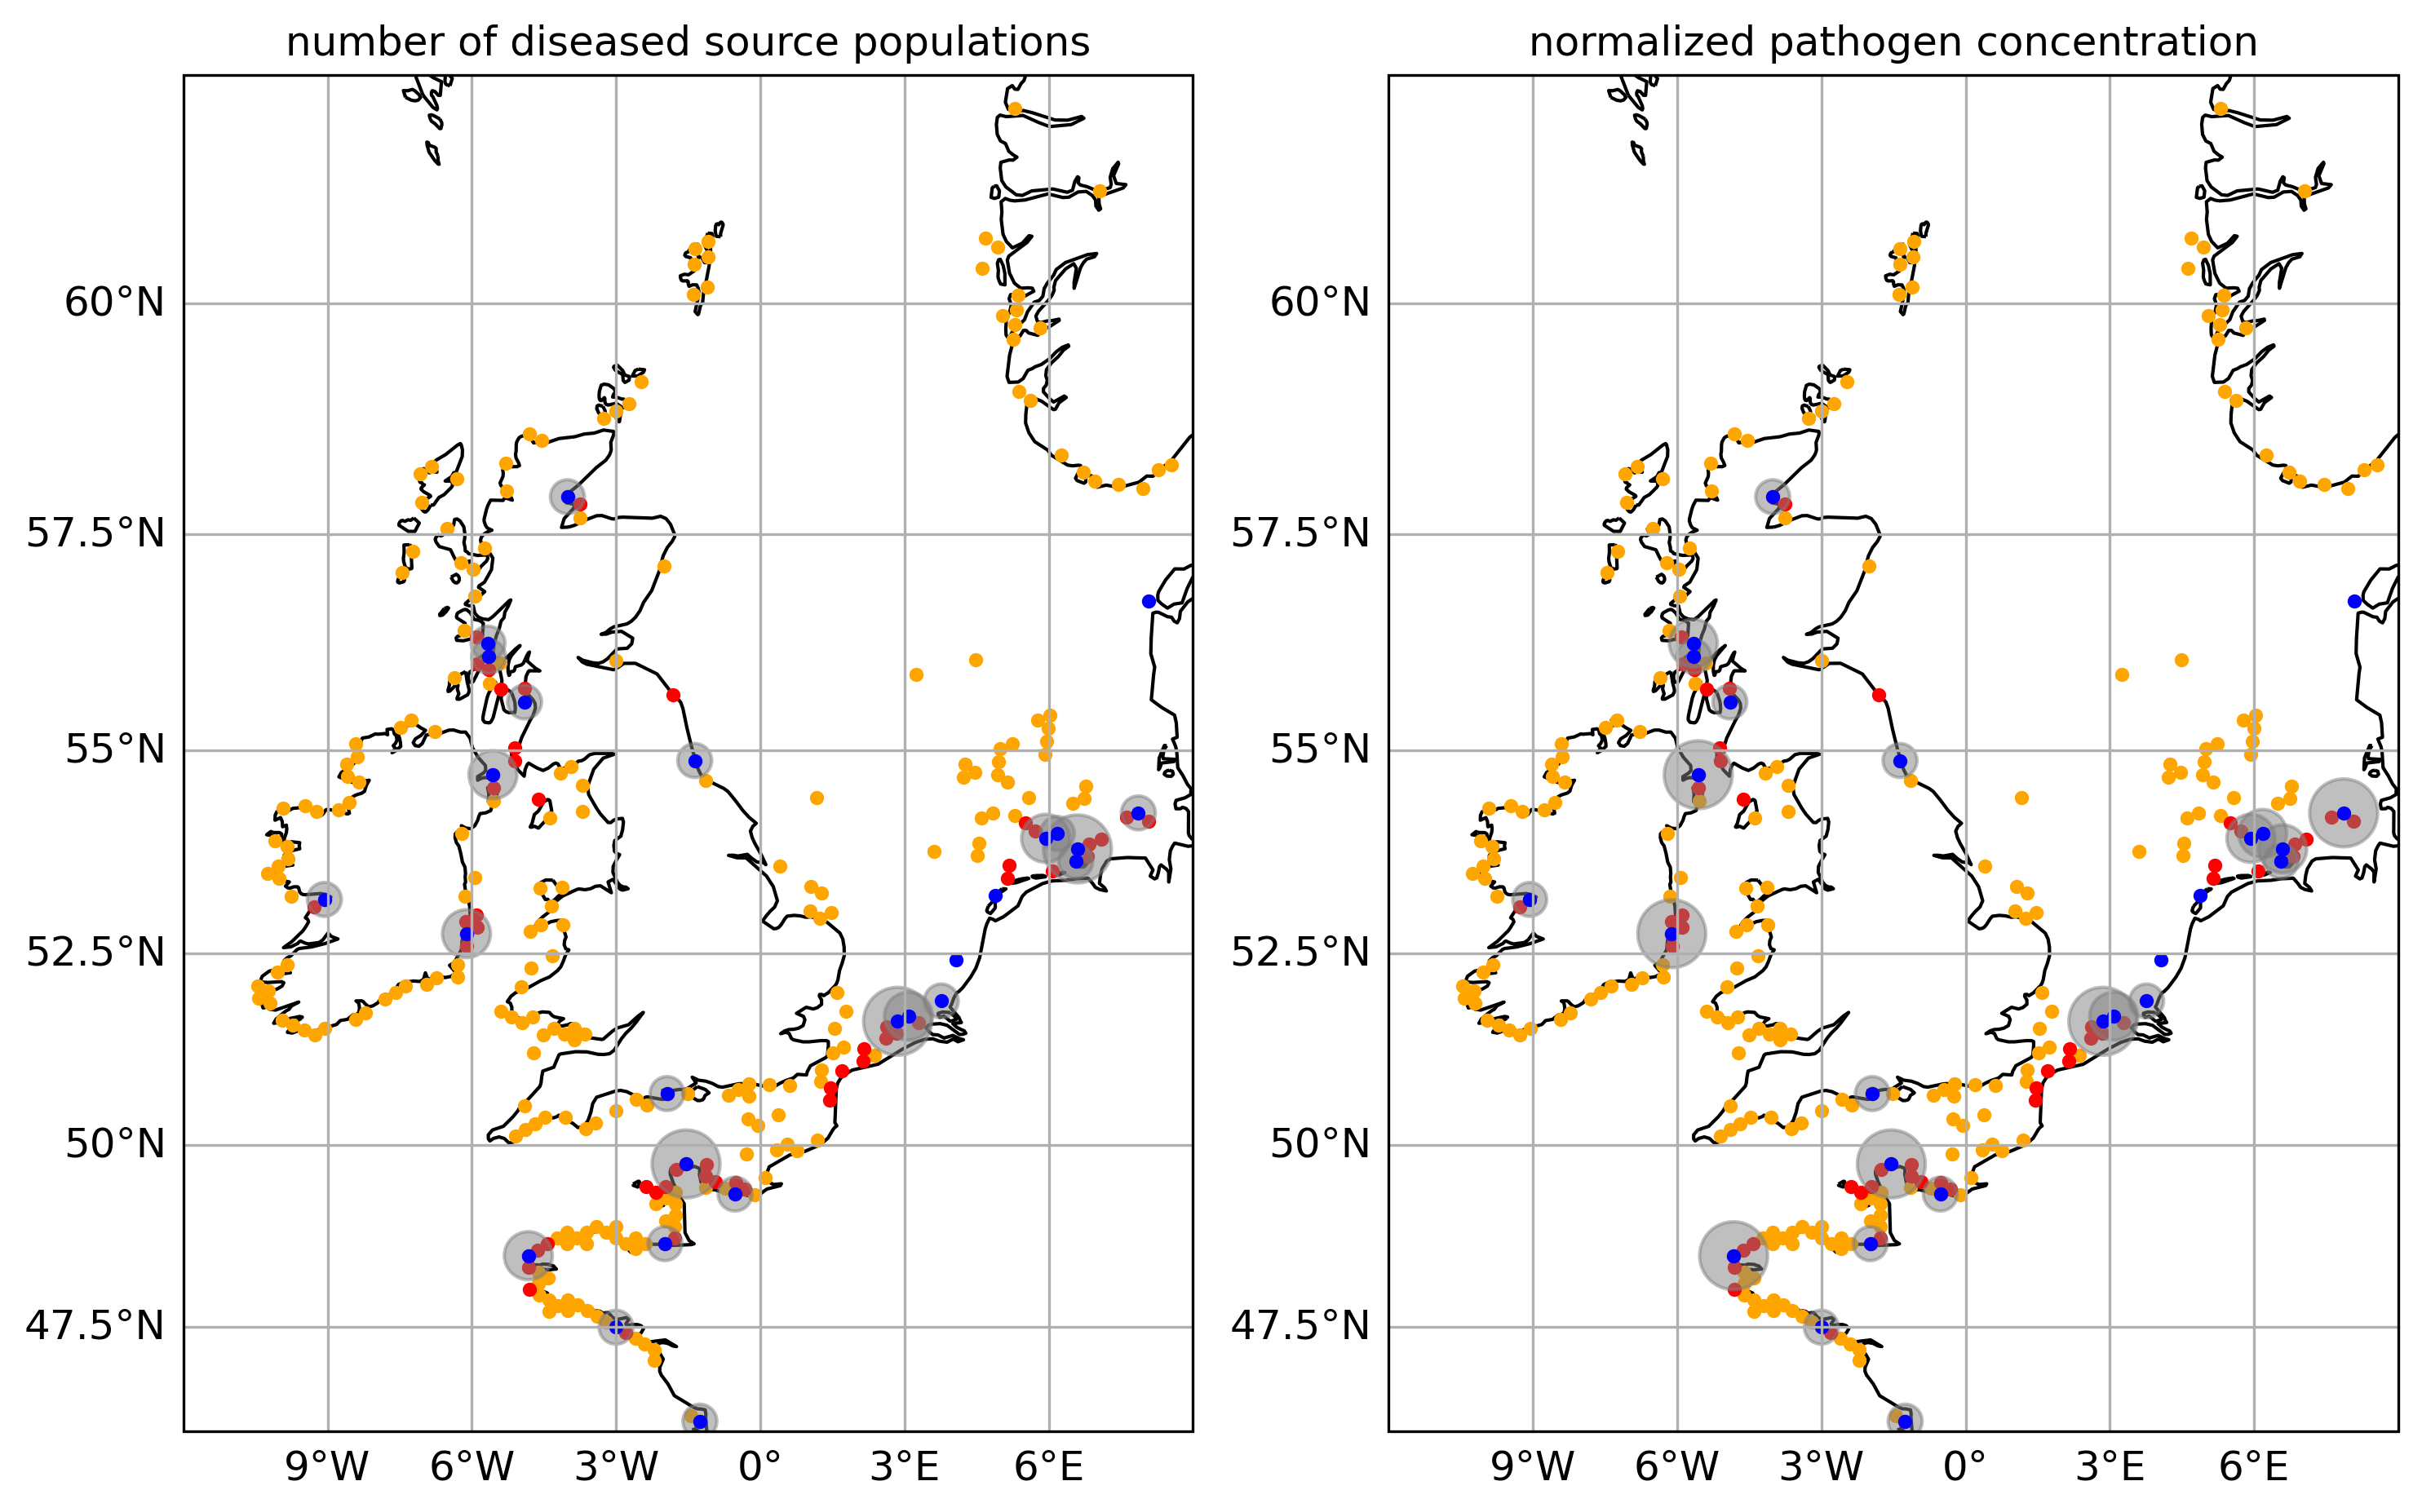

In [23]:
fig, ax = plt.subplots(
    1, 2,
    # subplot_kw={"projection": cartopy.crs.Stereographic(
    #     central_longitude=ds_conn.hex_proj__lon_origin,
    #     central_latitude=ds_conn.hex_proj__lat_origin,
    # )},
    subplot_kw={"projection": cartopy.crs.Mercator()},
    figsize=(10, 6.26),
)

fig.set_dpi(300)

fig.patch.set_alpha(0.7)

_dssaqchis_to_rst_stats = dssaqchis_to_rst_stats.copy()

_dssaqchis_to_rst_stats["rel_num_dss_sources_category"] *= 100
_dssaqchis_to_rst_stats["rel_pathogen_concentration_category"] *= 100

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

_dssaqchis_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_num_dss_sources_category",
    alpha=0.5, color="gray",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue",
    ax=ax[0], transform=cartopy.crs.PlateCarree()
)

ax[0].coastlines(zorder=0)

ax[0].set_title("number of diseased source populations")
ax[0].set_extent([-12, 9, 46, 62])
gl1 = ax[0].gridlines(draw_labels=True)
gl1.xlabel_style = {'size': 12}
gl1.ylabel_style = {'size': 12}
gl1.top_labels=False   # suppress top labels
gl1.right_labels=False # suppress right labels;

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

_dssaqchis_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_pathogen_concentration_category",
    alpha=0.5, color="gray",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue",
    ax=ax[1], transform=cartopy.crs.PlateCarree()
)

ax[1].coastlines(zorder=0)

ax[1].set_title("normalized pathogen concentration")
ax[1].set_extent([-12, 9, 46, 62])
gl2 = ax[1].gridlines(draw_labels=True)
gl2.xlabel_style = {'size': 12}
gl2.ylabel_style = {'size': 12}
gl2.top_labels=False   # suppress top labels
gl2.right_labels=False # suppress right labels;

fig.tight_layout();

fig.savefig("plots/041_rest-sites_risk-analsysis_dssaqchis_15m_00-07.pdf")

### Diseased to Restoration AVERAGE 00-07

In [24]:
dss_to_rst_01y = ds_conn_07.obs_per_origin_area.where(
    (ds_conn_07.dss_count_hex0 > 0),
    drop=True,
).where(
    (ds_conn_07.rst_count_hex1 > 0)
)

dss_to_rst_01y

<xarray.DataArray 'obs_per_origin_area' (month: 5, year: 4, hex0: 55, hex1: 8282)> Size: 73MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * hex0       (hex0) <U47 10kB '(-1, -36, 37)' ... '(6, -40, 34)'
  * hex1       (hex1) <U47 2MB '(-1, -2, 3)' '(-1, -20, 21)' ... '(9, 9, -18)'
  * month      (month) float64 40B 0.0 1.0 2.0 3.0 4.0
  * year       (year) float64 32B 0.0 1.0 2.0 3.0
    lon_hex0   (hex0) float64 440B -3.204 -3.199 -5.168 ... -1.983 -1.762 -1.778
    lon_hex1   (hex1) float64 66kB -3.229 -3.215 -3.212 ... -0.8121 -0.8032
    lat_hex0   (hex0) float64 440B 48.82 47.57 51.68 50.12 ... 48.66 49.35 48.73
    lat_hex1   (hex1) float64 66kB 54.11 51.31 50.69 50.53 ... 56.27 56.43 56.58
    hex_label  (hex0) <U14 3kB '(-1, -36, 37)' ... '(6, -40, 34)'

In [25]:
known_rst_sites = ds_conn_07.rst_count_hex0.where(ds_conn_07.rst_count_hex0 > 0).to_dataset().to_pandas().dropna()
known_rst_sites

lon_hex0   lat_hex0       hex_label  rst_count_hex0
hex0                                                               
(-11, 16, -5)  -5.652154  56.105601   (-11, 16, -5)             1.0
(-11, 17, -6)  -5.662842  56.261053   (-11, 17, -6)             1.0
(-11, 7, 4)    -5.560333  54.706424     (-11, 7, 4)             1.0
(-14, -4, 18)  -6.110616  52.746676   (-14, -4, 18)             1.0
(-27, 6, 21)   -9.065311  53.176870    (-27, 6, 21)             1.0
(-4, 24, -20)  -4.011904  57.918896   (-4, 24, -20)             1.0
(-8, 11, -3)   -4.902596  55.574491    (-8, 11, -3)             1.0
(-9, -34, 43)  -4.824256  48.488479   (-9, -34, 43)             2.0
(0, -45, 45)   -3.000000  47.489861    (0, -45, 45)             1.0
(12, -39, 27)  -0.525187  49.333480   (12, -39, 27)             1.0
(27, -31, 4)    2.854403  51.626277    (27, -31, 4)             2.0
(28, -31, 3)    3.080785  51.692529    (28, -31, 3)             1.0
(31, -31, 0)    3.764009  51.888537    (31, -31, 0)             1.0
(32, -28, -4)   4.067194  52.417435   (32, -28, -4)             1.0
(35, -24, -11)  4.878878  53.225639  (35, -24, -11)             1.0
(39, -21, -18)  5.933679  53.933641  (39, -21, -18)             1.0
(40, -21, -19)  6.177440  53.993490  (40, -21, -19)             1.0
(42, -23, -19)  6.595486  53.803701  (42, -23, -19)             1.0
(42, -24, -18)  6.560140  53.649690  (42, -24, -18)             1.0
(45, -5, -40)   8.080625  56.741595   (45, -5, -40)             1.0
(47, -22, -25)  7.862873  54.244597  (47, -22, -25)             1.0
(5, -27, 22)   -1.939319  50.680946    (5, -27, 22)             1.0
(5, -40, 35)   -1.983200  48.655073    (5, -40, 35)             1.0
(7, -1, -6)    -1.364036  54.877988     (7, -1, -6)             1.0
(7, -34, 27)   -1.544287  49.741493    (7, -34, 27)             1.0
(9, -58, 49)   -1.256751  46.148070    (9, -58, 49)             1.0

In [26]:
dss_origins_01y = dss_to_rst_01y.sum(["month", "year", "hex1"]).compute().to_dataset().to_pandas()
dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).dropna()

lon_hex0   lat_hex0      hex_label  obs_per_origin_area
hex0                                                                  
(-4, 24, -20) -4.011904  57.918896  (-4, 24, -20)            64.755556
(-7, -34, 41) -4.423439  48.650487  (-7, -34, 41)             4.838710
(-8, -34, 42) -4.624173  48.569670  (-8, -34, 42)           271.875000
(-9, -34, 43) -4.824256  48.488479  (-9, -34, 43)         40644.642857
(-9, -35, 44) -4.818560  48.332570  (-9, -35, 44)            50.909091
(-9, -37, 46) -4.807300  48.020705  (-9, -37, 46)           113.883117
(0, -45, 45)  -3.000000  47.489861   (0, -45, 45)           158.166667
(1, -46, 45)  -2.801599  47.411644   (1, -46, 45)            37.493333
(5, -27, 22)  -1.939319  50.680946   (5, -27, 22)           540.400000
(5, -40, 35)  -1.983200  48.655073   (5, -40, 35)           234.000000
(6, -40, 34)  -1.777946  48.730928   (6, -40, 34)             8.216216

In [27]:
dss_destinations_01y = dss_to_rst_01y.sum(["month", "year", "hex0"]).compute().to_dataset().to_pandas()
dss_destinations_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                  0.0
(-1, -20, 21) -3.215043  51.308774                  0.0
(-1, -24, 25) -3.212150  50.685757                  0.0
(-1, -25, 26) -3.211441  50.529976                  0.0
(-1, -26, 27) -3.210739  50.374185                  0.0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                  0.0
(9, 6, -15)   -0.829731  56.114857                  0.0
(9, 7, -16)   -0.820982  56.270351                  0.0
(9, 8, -17)   -0.812150  56.425843                  0.0
(9, 9, -18)   -0.803232  56.581335                  0.0

[8282 rows x 3 columns]

In [28]:
dss_origin_count_01y = (dss_to_rst_01y.sum(["month", "year"]) > 0).sum("hex0").compute().to_dataset().to_pandas()
dss_origin_count_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                    0
(-1, -20, 21) -3.215043  51.308774                    0
(-1, -24, 25) -3.212150  50.685757                    0
(-1, -25, 26) -3.211441  50.529976                    0
(-1, -26, 27) -3.210739  50.374185                    0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                    0
(9, 6, -15)   -0.829731  56.114857                    0
(9, 7, -16)   -0.820982  56.270351                    0
(9, 8, -17)   -0.812150  56.425843                    0
(9, 9, -18)   -0.803232  56.581335                    0

[8282 rows x 3 columns]

In [29]:
dss_to_rst_stats = (
    dss_origin_count_01y
    .where(dss_origin_count_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"lon_hex1": "lon", "lat_hex1": "lat", "obs_per_origin_area": "num_dss_sources"})
)

dss_to_rst_stats = dss_to_rst_stats.join(
    dss_destinations_01y
    .where(dss_destinations_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"obs_per_origin_area": "rel_pathogen_concentration"})
    [["rel_pathogen_concentration"]]
)

dss_to_rst_stats["rel_pathogen_concentration"] /= dss_to_rst_stats["rel_pathogen_concentration"].max()

dss_to_rst_stats["rel_num_dss_sources"] = dss_to_rst_stats["num_dss_sources"] / dss_to_rst_stats["num_dss_sources"].max()

dss_to_rst_stats.where(dss_to_rst_stats.rel_pathogen_concentration > 0).dropna()

lon        lat  num_dss_sources  \
hex1                                                  
(-9, -34, 43) -4.824256  48.488479              5.0   
(5, -40, 35)  -1.983200  48.655073              2.0   
(0, -45, 45)  -3.000000  47.489861              2.0   
(-4, 24, -20) -4.011904  57.918896              1.0   
(5, -27, 22)  -1.939319  50.680946              1.0   

               rel_pathogen_concentration  rel_num_dss_sources  
hex1                                                            
(-9, -34, 43)                    1.000000                  1.0  
(5, -40, 35)                     0.005895                  0.4  
(0, -45, 45)                     0.004762                  0.4  
(-4, 24, -20)                    0.001576                  0.2  
(5, -27, 22)                     0.013153                  0.2

In [30]:
import pandas as pd

In [31]:
dss_to_rst_stats.num_dss_sources.unique()

array([5., 2., 1.])

In [32]:
dss_to_rst_stats["rel_num_dss_sources_category"] = pd.cut(
    dss_to_rst_stats.rel_num_dss_sources,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)
dss_to_rst_stats["rel_pathogen_concentration_category"] = pd.cut(
    dss_to_rst_stats.rel_pathogen_concentration,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)

ValueError: Bin edges must be unique: Index([0.2, 0.4, 0.4, 1.0], dtype='float64', name='rel_num_dss_sources').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [33]:
dss_to_rst_stats

lon        lat  num_dss_sources  \
hex1                                                  
(-9, -34, 43) -4.824256  48.488479              5.0   
(5, -40, 35)  -1.983200  48.655073              2.0   
(0, -45, 45)  -3.000000  47.489861              2.0   
(-4, 24, -20) -4.011904  57.918896              1.0   
(5, -27, 22)  -1.939319  50.680946              1.0   

               rel_pathogen_concentration  rel_num_dss_sources  
hex1                                                            
(-9, -34, 43)                    1.000000                  1.0  
(5, -40, 35)                     0.005895                  0.4  
(0, -45, 45)                     0.004762                  0.4  
(-4, 24, -20)                    0.001576                  0.2  
(5, -27, 22)                     0.013153                  0.2

KeyError: 'rel_num_dss_sources_category'

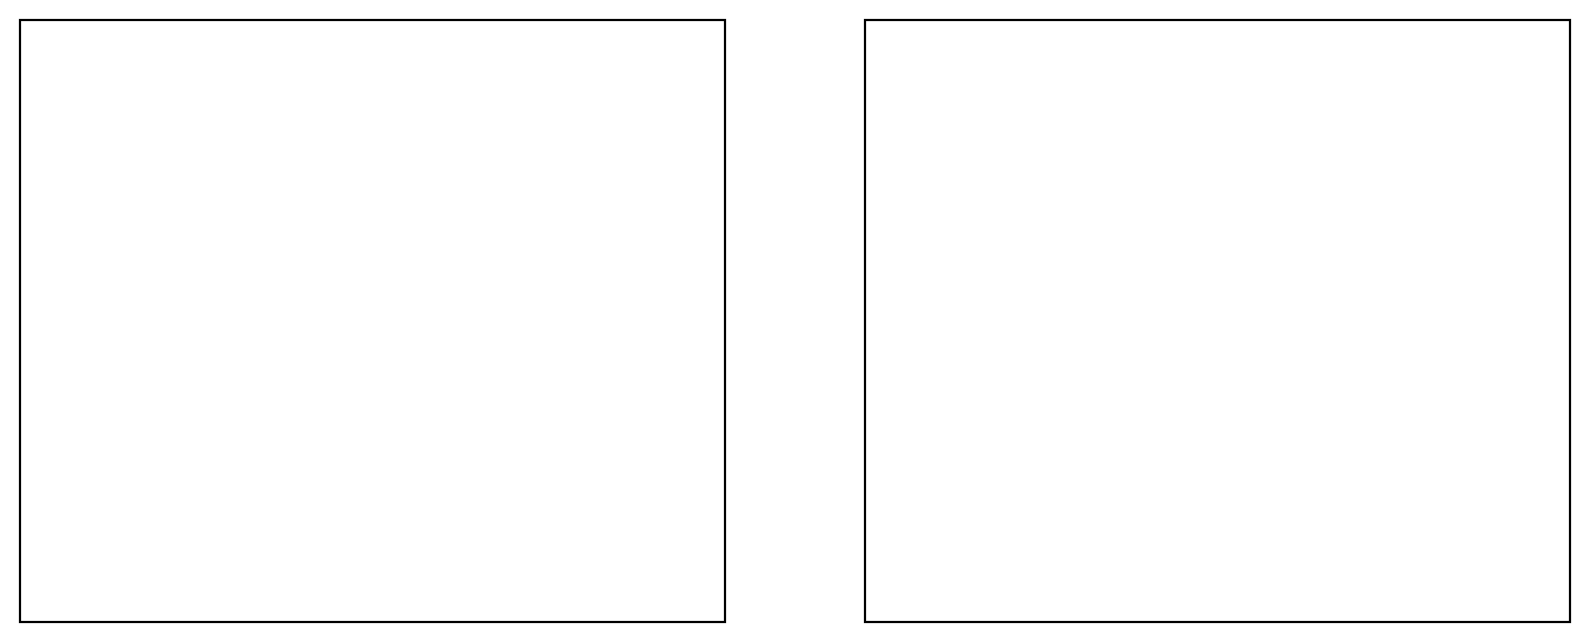

In [34]:
fig, ax = plt.subplots(
    1, 2,
    # subplot_kw={"projection": cartopy.crs.Stereographic(
    #     central_longitude=ds_conn.hex_proj__lon_origin,
    #     central_latitude=ds_conn.hex_proj__lat_origin,
    # )},
    subplot_kw={"projection": cartopy.crs.Mercator()},
    figsize=(10, 6.26),
)

fig.set_dpi(200)

fig.patch.set_alpha(0.7)

_dss_to_rst_stats = dss_to_rst_stats.copy()

_dss_to_rst_stats["rel_num_dss_sources_category"] *= 100
_dss_to_rst_stats["rel_pathogen_concentration_category"] *= 100

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

_dss_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_num_dss_sources_category",
    alpha=0.5, color="gray",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue", 
    ax=ax[0], transform=cartopy.crs.PlateCarree()
)

ax[0].coastlines(zorder=0)

ax[0].set_title("number of diseased source populations")
ax[0].set_extent([-12, 9, 46, 62])
gl1 = ax[0].gridlines(draw_labels=True)
gl1.xlabel_style = {'size': 12}
gl1.ylabel_style = {'size': 12}
gl1.top_labels=False   # suppress top labels
gl1.right_labels=False # suppress right labels;

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

_dss_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_pathogen_concentration_category",
    alpha=0.5, color="gray",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue", 
    ax=ax[1], transform=cartopy.crs.PlateCarree()
)

ax[1].coastlines(zorder=0)

ax[1].set_title("normalized pathogen concentration")
ax[1].set_extent([-12, 9, 46, 62])
gl2 = ax[1].gridlines(draw_labels=True)
gl2.xlabel_style = {'size': 12}
gl2.ylabel_style = {'size': 12}
gl2.top_labels=False   # suppress top labels
gl2.right_labels=False # suppress right labels;

fig.tight_layout();

fig.savefig("plots/041_rest-sites_risk-analsysis_15m_00-07.pdf")

### Diseased + aquaculture + historical to restoration AVERAGE 07-14

In [35]:
dssaqchis_to_rst_01y = ds_conn_14.obs_per_origin_area.where(
    (ds_conn_14.dss_count_hex0 > 0) | (ds_conn_14.his_count_hex0 > 0) | (ds_conn_14.aqc_count_hex0 > 0),
    drop=True,
).where(
    (ds_conn_14.rst_count_hex1 > 0)
)

dssaqchis_to_rst_01y

<xarray.DataArray 'obs_per_origin_area' (month: 5, year: 4, hex0: 306,
                                         hex1: 8282)> Size: 405MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * hex0       (hex0) <U47 58kB '(-1, -36, 37)' ... '(9, -58, 49)'
  * hex1       (hex1) <U47 2MB '(-1, -2, 3)' '(-1, -20, 21)' ... '(9, 9, -18)'
  * month      (month) float64 40B 0.0 1.0 2.0 3.0 4.0
  * year       (year) float64 32B 0.0 1.0 2.0 3.0
    lon_hex0   (hex0) float64 2kB -3.204 -3.199 nan ... -1.135 -1.141 -1.257
    lon_hex1   (hex1) float64 66kB -3.229 -3.215 -3.212 ... -0.8121 -0.8032
    lat_hex0   (hex0) float64 2kB 48.82 47.57 nan 58.78 ... 49.58 49.42 46.15
    lat_hex1   (hex1) float64 66kB 54.11 51.31 50.69 50.53 ... 56.27 56.43 56.58
    hex_label  (hex0) <U14 17kB '(-1, -36, 37)' ... '(9, -58, 49)'

In [36]:
known_rst_sites = ds_conn_14.rst_count_hex0.where(ds_conn_14.rst_count_hex0 > 0).to_dataset().to_pandas().dropna()
known_rst_sites

lon_hex0   lat_hex0       hex_label  rst_count_hex0
hex0                                                               
(-11, 16, -5)  -5.652154  56.105601   (-11, 16, -5)             1.0
(-11, 17, -6)  -5.662842  56.261053   (-11, 17, -6)             1.0
(-11, 7, 4)    -5.560333  54.706424     (-11, 7, 4)             1.0
(-14, -4, 18)  -6.110616  52.746676   (-14, -4, 18)             1.0
(-27, 6, 21)   -9.065311  53.176870    (-27, 6, 21)             1.0
(-4, 24, -20)  -4.011904  57.918896   (-4, 24, -20)             1.0
(-8, 11, -3)   -4.902596  55.574491    (-8, 11, -3)             1.0
(-9, -34, 43)  -4.824256  48.488479   (-9, -34, 43)             2.0
(0, -45, 45)   -3.000000  47.489861    (0, -45, 45)             1.0
(12, -39, 27)  -0.525187  49.333480   (12, -39, 27)             1.0
(27, -31, 4)    2.854403  51.626277    (27, -31, 4)             2.0
(28, -31, 3)    3.080785  51.692529    (28, -31, 3)             1.0
(31, -31, 0)    3.764009  51.888537    (31, -31, 0)             1.0
(32, -28, -4)   4.067194  52.417435   (32, -28, -4)             1.0
(35, -24, -11)  4.878878  53.225639  (35, -24, -11)             1.0
(39, -21, -18)  5.933679  53.933641  (39, -21, -18)             1.0
(40, -21, -19)  6.177440  53.993490  (40, -21, -19)             1.0
(42, -23, -19)  6.595486  53.803701  (42, -23, -19)             1.0
(42, -24, -18)  6.560140  53.649690  (42, -24, -18)             1.0
(45, -5, -40)   8.080625  56.741595   (45, -5, -40)             1.0
(47, -22, -25)  7.862873  54.244597  (47, -22, -25)             1.0
(5, -27, 22)   -1.939319  50.680946    (5, -27, 22)             1.0
(5, -40, 35)   -1.983200  48.655073    (5, -40, 35)             1.0
(7, -1, -6)    -1.364036  54.877988     (7, -1, -6)             1.0
(7, -34, 27)   -1.544287  49.741493    (7, -34, 27)             1.0
(9, -58, 49)   -1.256751  46.148070    (9, -58, 49)             1.0

In [37]:
dssaqchis_origins_01y = dssaqchis_to_rst_01y.sum(["month", "year", "hex1"]).compute().to_dataset().to_pandas()
dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] > 0).dropna()

lon_hex0   lat_hex0       hex_label  obs_per_origin_area
hex0                                                                    
(-10, 13, -3)  -5.387340  55.721769   (-10, 13, -3)          8853.789474
(-11, 17, -6)  -5.662842  56.261053   (-11, 17, -6)          4935.000000
(-11, 6, 5)    -5.550592  54.550942     (-11, 6, 5)             8.612903
(-11, 7, 4)    -5.560333  54.706424     (-11, 7, 4)          3485.240000
(-12, 18, -6)  -5.910535  56.333420   (-12, 18, -6)          1279.861111
(-13, -3, 16)  -5.904284  52.985637   (-13, -3, 16)          4750.938272
(-13, -4, 17)  -5.893848  52.830131   (-13, -4, 17)         49374.000000
(-14, -3, 17)  -6.121802  52.902162   (-14, -3, 17)            12.769231
(-14, -4, 18)  -6.110616  52.746676   (-14, -4, 18)         38670.050000
(-14, -5, 19)  -6.099526  52.591181   (-14, -5, 19)         18420.121951
(-18, 15, 3)   -7.260111  55.360027    (-18, 15, 3)             4.982143
(-28, 6, 22)   -9.277498  53.087650    (-28, 6, 22)            50.285714
(-3, 23, -20)  -3.757330  57.842815   (-3, 23, -20)            85.953488
(-5, 4, 1)     -4.164169  54.727783      (-5, 4, 1)            28.632911
(-7, -34, 41)  -4.423439  48.650487   (-7, -34, 41)             2.419355
(-7, -40, 47)  -4.397155  47.714762   (-7, -40, 47)            33.000000
(-7, 3, 4)     -4.617351  54.411338      (-7, 3, 4)          4220.125000
(-8, -38, 46)  -4.604073  47.945926   (-8, -38, 46)            79.138889
(-8, 12, -4)   -4.910122  55.730008    (-8, 12, -4)          5787.083333
(-9, -34, 43)  -4.824256  48.488479   (-9, -34, 43)           294.642857
(-9, -37, 46)  -4.807300  48.020705   (-9, -37, 46)           199.038961
(-9, 7, 2)     -5.103151  54.870838      (-9, 7, 2)          4069.789474
(-9, 8, 1)     -5.111271  55.026350      (-9, 8, 1)          1155.407407
(10, -37, 27)  -0.930770  49.497823   (10, -37, 27)            63.000000
(12, -38, 26)  -0.517196  49.489250   (12, -38, 26)            93.000000
(13, -39, 26)  -0.314799  49.406505   (13, -39, 26)            81.000000
(21, -34, 13)   1.464873  50.753078   (21, -34, 13)          4497.000000
(21, -35, 14)   1.449937  50.597642   (21, -35, 14)          3251.000000
(22, -33, 11)   1.700652  50.977523   (22, -33, 11)         10847.768116
(24, -32, 8)    2.161652  51.269533    (24, -32, 8)         52739.000000
(24, -33, 9)    2.144106  51.114248    (24, -33, 9)          1699.228916
(25, -33, 8)    2.366840  51.181945    (25, -33, 8)            64.000000
(26, -31, 5)    2.628702  51.559571    (26, -31, 5)         65103.000000
(26, -32, 6)    2.609394  51.404391    (26, -32, 6)        127366.000000
(27, -32, 5)    2.834279  51.471146    (27, -32, 5)         56566.000000
(29, -32, 3)    3.286076  51.603296    (29, -32, 3)          3836.000000
(3, -34, 31)   -2.380093  49.437628    (3, -34, 31)          1376.263158
(36, -22, -14)  5.176539  53.596636  (36, -22, -14)         39107.000000
(36, -23, -13)  5.146607  53.442176  (36, -23, -13)          1411.282051
(37, -19, -18)  5.511447  54.121133  (37, -19, -18)           194.000000
(38, -20, -18)  5.723025  54.027570  (38, -20, -18)         24858.000000
(4, -35, 31)   -2.174802  49.358334    (4, -35, 31)           642.000000
(40, -24, -16)  6.076253  53.531018  (40, -24, -16)           166.434783
(42, -19, -23)  6.740036  54.419557  (42, -19, -23)            39.000000
(42, -24, -18)  6.560140  53.649690  (42, -24, -18)           453.804878
(43, -23, -20)  6.839446  53.862196  (43, -23, -20)         25567.000000
(44, -23, -21)  7.084108  53.920182  (44, -23, -21)          6927.000000
(46, -22, -24)  7.615120  54.188249  (46, -22, -24)         29918.000000
(48, -23, -25)  8.069746  54.146984  (48, -23, -25)          6429.000000
(5, -35, 30)   -1.966862  49.434515    (5, -35, 30)           640.000000
(5, -36, 31)   -1.970182  49.278654    (5, -36, 31)            36.818182
(5, 5, -10)    -1.808362  55.661158     (5, 5, -10)          2913.860000
(6, -34, 28)   -1.754233  49.666129    (6, -34, 28)         20000.000000
(

In [38]:
dssaqchis_destinations_01y = dssaqchis_to_rst_01y.sum(["month", "year", "hex0"]).compute().to_dataset().to_pandas()
dssaqchis_destinations_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                  0.0
(-1, -20, 21) -3.215043  51.308774                  0.0
(-1, -24, 25) -3.212150  50.685757                  0.0
(-1, -25, 26) -3.211441  50.529976                  0.0
(-1, -26, 27) -3.210739  50.374185                  0.0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                  0.0
(9, 6, -15)   -0.829731  56.114857                  0.0
(9, 7, -16)   -0.820982  56.270351                  0.0
(9, 8, -17)   -0.812150  56.425843                  0.0
(9, 9, -18)   -0.803232  56.581335                  0.0

[8282 rows x 3 columns]

In [39]:
dssaqchis_origin_count_01y = (dssaqchis_to_rst_01y.sum(["month", "year"]) > 0).sum("hex0").compute().to_dataset().to_pandas()
dssaqchis_origin_count_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                    0
(-1, -20, 21) -3.215043  51.308774                    0
(-1, -24, 25) -3.212150  50.685757                    0
(-1, -25, 26) -3.211441  50.529976                    0
(-1, -26, 27) -3.210739  50.374185                    0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                    0
(9, 6, -15)   -0.829731  56.114857                    0
(9, 7, -16)   -0.820982  56.270351                    0
(9, 8, -17)   -0.812150  56.425843                    0
(9, 9, -18)   -0.803232  56.581335                    0

[8282 rows x 3 columns]

In [40]:
dssaqchis_to_rst_stats = (
    dssaqchis_origin_count_01y
    .where(dssaqchis_origin_count_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"lon_hex1": "lon", "lat_hex1": "lat", "obs_per_origin_area": "num_dss_sources"})
)

dssaqchis_to_rst_stats = dssaqchis_to_rst_stats.join(
    dssaqchis_destinations_01y
    .where(dssaqchis_destinations_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"obs_per_origin_area": "rel_pathogen_concentration"})
    [["rel_pathogen_concentration"]]
)

dssaqchis_to_rst_stats["rel_pathogen_concentration"] /= dssaqchis_to_rst_stats["rel_pathogen_concentration"].max()

dssaqchis_to_rst_stats["rel_num_dss_sources"] = dssaqchis_to_rst_stats["num_dss_sources"] / dssaqchis_to_rst_stats["num_dss_sources"].max()

dssaqchis_to_rst_stats.where(dssaqchis_to_rst_stats.rel_pathogen_concentration > 0).dropna()

lon        lat  num_dss_sources  \
hex1                                                   
(7, -34, 27)   -1.544287  49.741493             10.0   
(27, -31, 4)    2.854403  51.626277             10.0   
(28, -31, 3)    3.080785  51.692529              8.0   
(-11, 7, 4)    -5.560333  54.706424              7.0   
(42, -23, -19)  6.595486  53.803701              6.0   
(40, -21, -19)  6.177440  53.993490              5.0   
(-14, -4, 18)  -6.110616  52.746676              5.0   
(47, -22, -25)  7.862873  54.244597              5.0   
(-9, -34, 43)  -4.824256  48.488479              5.0   
(-8, 11, -3)   -4.902596  55.574491              4.0   
(39, -21, -18)  5.933679  53.933641              4.0   
(-11, 17, -6)  -5.662842  56.261053              2.0   
(12, -39, 27)  -0.525187  49.333480              2.0   
(-27, 6, 21)   -9.065311  53.176870              1.0   
(31, -31, 0)    3.764009  51.888537              1.0   
(-4, 24, -20)  -4.011904  57.918896              1.0   
(42, -24, -18)  6.560140  53.649690              1.0   
(5, -27, 22)   -1.939319  50.680946              1.0   
(5, -40, 35)   -1.983200  48.655073              1.0   
(7, -1, -6)    -1.364036  54.877988              1.0   

                rel_pathogen_concentration  rel_num_dss_sources  
hex1                                                             
(7, -34, 27)                      0.203667                  1.0  
(27, -31, 4)                      1.000000                  1.0  
(28, -31, 3)                      0.274544                  0.8  
(-11, 7, 4)                       0.047908                  0.7  
(42, -23, -19)                    0.131634                  0.6  
(40, -21, -19)                    0.078901                  0.5  
(-14, -4, 18)                     0.434904                  0.5  
(47, -22, -25)                    0.142450                  0.5  
(-9, -34, 43)                     0.002378                  0.5  
(-8, 11, -3)                      0.060062                  0.4  
(39, -21, -18)                    0.175132                  0.4  
(-11, 17, -6)                     0.024300                  0.2  
(12, -39, 27)                     0.000665                  0.2  
(-27, 6, 21)                      0.000197                  0.1  
(31, -31, 0)                      0.000004                  0.1  
(-4, 24, -20)                     0.000336                  0.1  
(42, -24, -18)                    0.000012                  0.1  
(5, -27, 22)                      0.000136                  0.1  
(5, -40, 35)                      0.000016                  0.1  
(7, -1, -6)                       0.011393                  0.1

In [41]:
dssaqchis_to_rst_stats.num_dss_sources.unique()

array([10.,  8.,  7.,  6.,  5.,  4.,  2.,  1.])

In [42]:
dssaqchis_to_rst_stats["rel_num_dss_sources_category"] = pd.cut(
    dssaqchis_to_rst_stats.rel_num_dss_sources,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)
dssaqchis_to_rst_stats["rel_pathogen_concentration_category"] = pd.cut(
    dssaqchis_to_rst_stats.rel_pathogen_concentration,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)

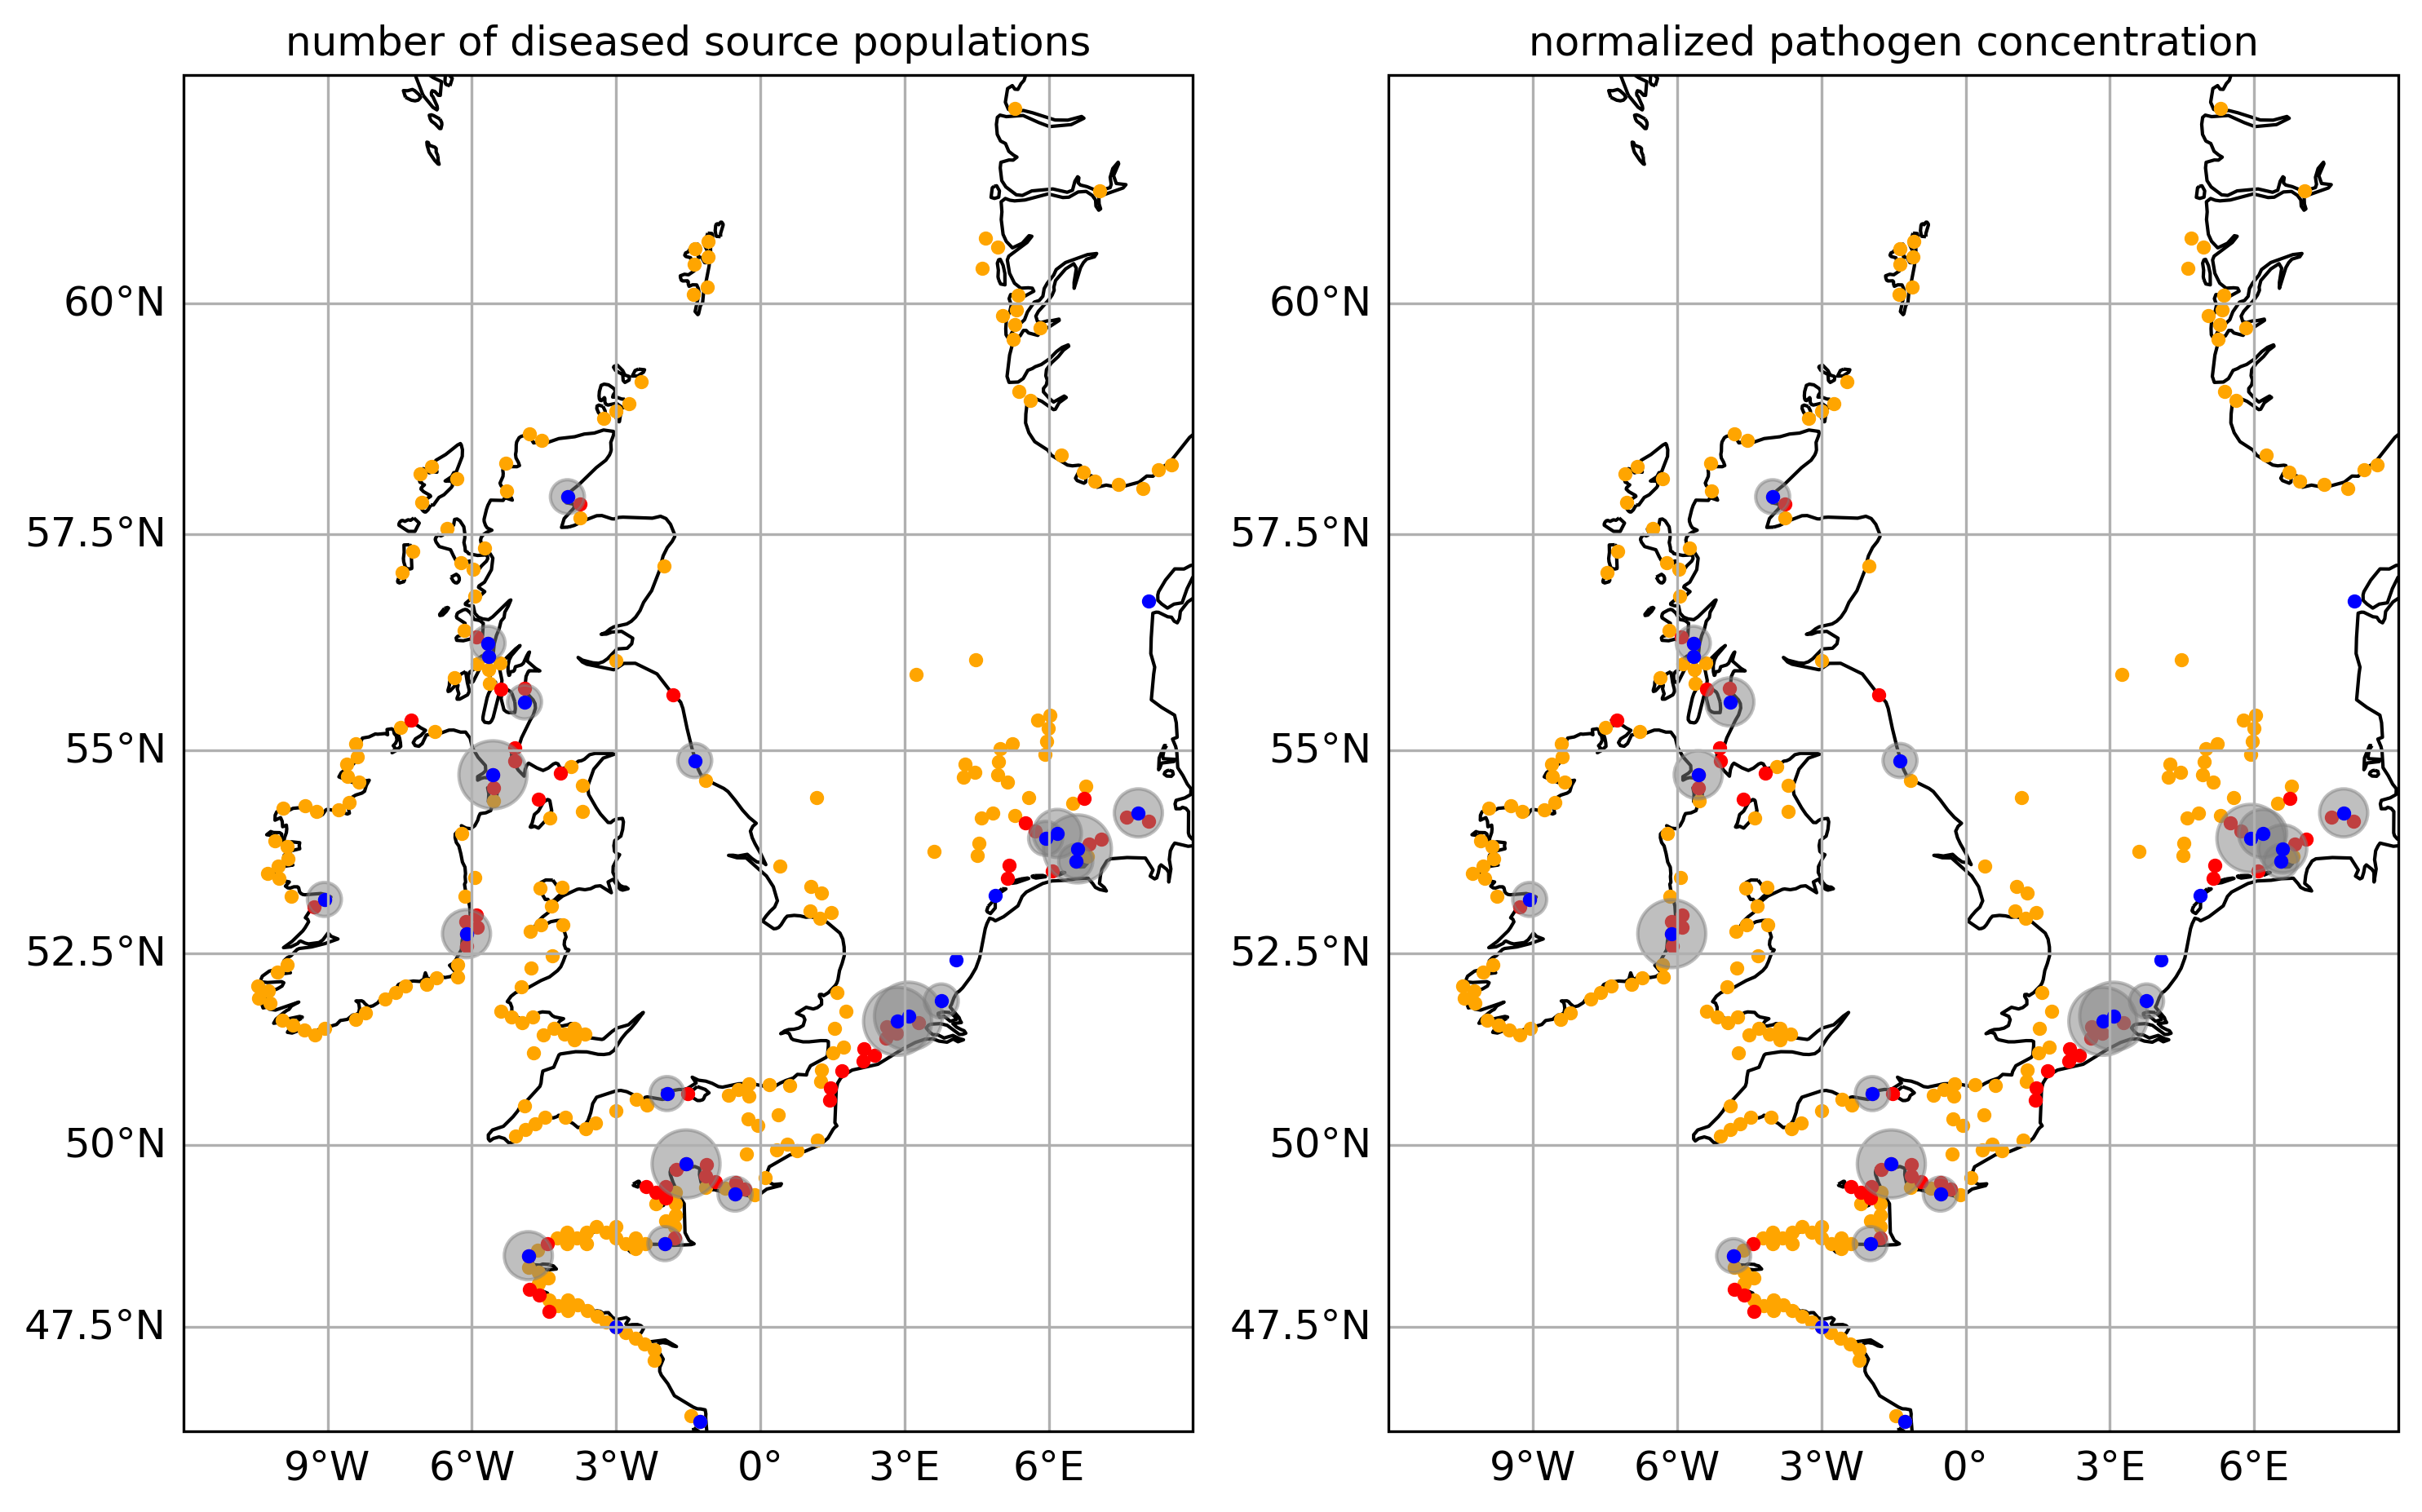

In [43]:
fig, ax = plt.subplots(
    1, 2,
    # subplot_kw={"projection": cartopy.crs.Stereographic(
    #     central_longitude=ds_conn.hex_proj__lon_origin,
    #     central_latitude=ds_conn.hex_proj__lat_origin,
    # )},
    subplot_kw={"projection": cartopy.crs.Mercator()},
    figsize=(10, 6.26),
)

fig.set_dpi(300)

fig.patch.set_alpha(0.7)

_dssaqchis_to_rst_stats = dssaqchis_to_rst_stats.copy()

_dssaqchis_to_rst_stats["rel_num_dss_sources_category"] *= 100
_dssaqchis_to_rst_stats["rel_pathogen_concentration_category"] *= 100

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

_dssaqchis_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_num_dss_sources_category",
    alpha=0.5, color="gray",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue",
    ax=ax[0], transform=cartopy.crs.PlateCarree()
)

ax[0].coastlines(zorder=0)

ax[0].set_title("number of diseased source populations")
ax[0].set_extent([-12, 9, 46, 62])
gl1 = ax[0].gridlines(draw_labels=True)
gl1.xlabel_style = {'size': 12}
gl1.ylabel_style = {'size': 12}
gl1.top_labels=False   # suppress top labels
gl1.right_labels=False # suppress right labels;

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

_dssaqchis_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_pathogen_concentration_category",
    alpha=0.5, color="gray",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue",
    ax=ax[1], transform=cartopy.crs.PlateCarree()
)

ax[1].coastlines(zorder=0)

ax[1].set_title("normalized pathogen concentration")
ax[1].set_extent([-12, 9, 46, 62])
gl2 = ax[1].gridlines(draw_labels=True)
gl2.xlabel_style = {'size': 12}
gl2.ylabel_style = {'size': 12}
gl2.top_labels=False   # suppress top labels
gl2.right_labels=False # suppress right labels;

fig.tight_layout();

fig.savefig("plots/041_rest-sites_risk-analsysis_dssaqchis_15m_07-14.pdf")

### Diseased to Restoration AVERAGE 07-14

In [44]:
dss_to_rst_01y = ds_conn_14.obs_per_origin_area.where(
    (ds_conn_14.dss_count_hex0 > 0),
    drop=True,
).where(
    (ds_conn_14.rst_count_hex1 > 0)
)

dss_to_rst_01y

<xarray.DataArray 'obs_per_origin_area' (month: 5, year: 4, hex0: 55, hex1: 8282)> Size: 73MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * hex0       (hex0) <U47 10kB '(-1, -36, 37)' ... '(6, -40, 34)'
  * hex1       (hex1) <U47 2MB '(-1, -2, 3)' '(-1, -20, 21)' ... '(9, 9, -18)'
  * month      (month) float64 40B 0.0 1.0 2.0 3.0 4.0
  * year       (year) float64 32B 0.0 1.0 2.0 3.0
    lon_hex0   (hex0) float64 440B -3.204 -3.199 -5.168 ... -1.983 -1.762 -1.778
    lon_hex1   (hex1) float64 66kB -3.229 -3.215 -3.212 ... -0.8121 -0.8032
    lat_hex0   (hex0) float64 440B 48.82 47.57 51.68 50.12 ... 48.66 49.35 48.73
    lat_hex1   (hex1) float64 66kB 54.11 51.31 50.69 50.53 ... 56.27 56.43 56.58
    hex_label  (hex0) <U14 3kB '(-1, -36, 37)' ... '(6, -40, 34)'

In [45]:
known_rst_sites = ds_conn_14.rst_count_hex0.where(ds_conn_14.rst_count_hex0 > 0).to_dataset().to_pandas().dropna()
known_rst_sites

lon_hex0   lat_hex0       hex_label  rst_count_hex0
hex0                                                               
(-11, 16, -5)  -5.652154  56.105601   (-11, 16, -5)             1.0
(-11, 17, -6)  -5.662842  56.261053   (-11, 17, -6)             1.0
(-11, 7, 4)    -5.560333  54.706424     (-11, 7, 4)             1.0
(-14, -4, 18)  -6.110616  52.746676   (-14, -4, 18)             1.0
(-27, 6, 21)   -9.065311  53.176870    (-27, 6, 21)             1.0
(-4, 24, -20)  -4.011904  57.918896   (-4, 24, -20)             1.0
(-8, 11, -3)   -4.902596  55.574491    (-8, 11, -3)             1.0
(-9, -34, 43)  -4.824256  48.488479   (-9, -34, 43)             2.0
(0, -45, 45)   -3.000000  47.489861    (0, -45, 45)             1.0
(12, -39, 27)  -0.525187  49.333480   (12, -39, 27)             1.0
(27, -31, 4)    2.854403  51.626277    (27, -31, 4)             2.0
(28, -31, 3)    3.080785  51.692529    (28, -31, 3)             1.0
(31, -31, 0)    3.764009  51.888537    (31, -31, 0)             1.0
(32, -28, -4)   4.067194  52.417435   (32, -28, -4)             1.0
(35, -24, -11)  4.878878  53.225639  (35, -24, -11)             1.0
(39, -21, -18)  5.933679  53.933641  (39, -21, -18)             1.0
(40, -21, -19)  6.177440  53.993490  (40, -21, -19)             1.0
(42, -23, -19)  6.595486  53.803701  (42, -23, -19)             1.0
(42, -24, -18)  6.560140  53.649690  (42, -24, -18)             1.0
(45, -5, -40)   8.080625  56.741595   (45, -5, -40)             1.0
(47, -22, -25)  7.862873  54.244597  (47, -22, -25)             1.0
(5, -27, 22)   -1.939319  50.680946    (5, -27, 22)             1.0
(5, -40, 35)   -1.983200  48.655073    (5, -40, 35)             1.0
(7, -1, -6)    -1.364036  54.877988     (7, -1, -6)             1.0
(7, -34, 27)   -1.544287  49.741493    (7, -34, 27)             1.0
(9, -58, 49)   -1.256751  46.148070    (9, -58, 49)             1.0

In [46]:
dss_origins_01y = dss_to_rst_01y.sum(["month", "year", "hex1"]).compute().to_dataset().to_pandas()
dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).dropna()

lon_hex0   lat_hex0      hex_label  obs_per_origin_area
hex0                                                                  
(-7, -34, 41) -4.423439  48.650487  (-7, -34, 41)             2.419355
(-7, -40, 47) -4.397155  47.714762  (-7, -40, 47)            33.000000
(-8, -38, 46) -4.604073  47.945926  (-8, -38, 46)            79.138889
(-9, -34, 43) -4.824256  48.488479  (-9, -34, 43)           294.642857
(-9, -37, 46) -4.807300  48.020705  (-9, -37, 46)           199.038961
(6, -40, 34)  -1.777946  48.730928   (6, -40, 34)             4.108108

In [47]:
dss_destinations_01y = dss_to_rst_01y.sum(["month", "year", "hex0"]).compute().to_dataset().to_pandas()
dss_destinations_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                  0.0
(-1, -20, 21) -3.215043  51.308774                  0.0
(-1, -24, 25) -3.212150  50.685757                  0.0
(-1, -25, 26) -3.211441  50.529976                  0.0
(-1, -26, 27) -3.210739  50.374185                  0.0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                  0.0
(9, 6, -15)   -0.829731  56.114857                  0.0
(9, 7, -16)   -0.820982  56.270351                  0.0
(9, 8, -17)   -0.812150  56.425843                  0.0
(9, 9, -18)   -0.803232  56.581335                  0.0

[8282 rows x 3 columns]

In [48]:
dss_origin_count_01y = (dss_to_rst_01y.sum(["month", "year"]) > 0).sum("hex0").compute().to_dataset().to_pandas()
dss_origin_count_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                    0
(-1, -20, 21) -3.215043  51.308774                    0
(-1, -24, 25) -3.212150  50.685757                    0
(-1, -25, 26) -3.211441  50.529976                    0
(-1, -26, 27) -3.210739  50.374185                    0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                    0
(9, 6, -15)   -0.829731  56.114857                    0
(9, 7, -16)   -0.820982  56.270351                    0
(9, 8, -17)   -0.812150  56.425843                    0
(9, 9, -18)   -0.803232  56.581335                    0

[8282 rows x 3 columns]

In [49]:
dss_to_rst_stats = (
    dss_origin_count_01y
    .where(dss_origin_count_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"lon_hex1": "lon", "lat_hex1": "lat", "obs_per_origin_area": "num_dss_sources"})
)

dss_to_rst_stats = dss_to_rst_stats.join(
    dss_destinations_01y
    .where(dss_destinations_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"obs_per_origin_area": "rel_pathogen_concentration"})
    [["rel_pathogen_concentration"]]
)

dss_to_rst_stats["rel_pathogen_concentration"] /= dss_to_rst_stats["rel_pathogen_concentration"].max()

dss_to_rst_stats["rel_num_dss_sources"] = dss_to_rst_stats["num_dss_sources"] / dss_to_rst_stats["num_dss_sources"].max()

dss_to_rst_stats.where(dss_to_rst_stats.rel_pathogen_concentration > 0).dropna()

lon        lat  num_dss_sources  \
hex1                                                  
(-9, -34, 43) -4.824256  48.488479              5.0   
(5, -40, 35)  -1.983200  48.655073              1.0   

               rel_pathogen_concentration  rel_num_dss_sources  
hex1                                                            
(-9, -34, 43)                    1.000000                  1.0  
(5, -40, 35)                     0.006754                  0.2

In [50]:
import pandas as pd

In [51]:
dss_to_rst_stats.num_dss_sources.unique()

array([5., 1.])

In [52]:
dss_to_rst_stats["rel_num_dss_sources_category"] = pd.cut(
    dss_to_rst_stats.rel_num_dss_sources,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)
dss_to_rst_stats["rel_pathogen_concentration_category"] = pd.cut(
    dss_to_rst_stats.rel_pathogen_concentration,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)

In [53]:
dss_to_rst_stats

lon        lat  num_dss_sources  \
hex1                                                  
(-9, -34, 43) -4.824256  48.488479              5.0   
(5, -40, 35)  -1.983200  48.655073              1.0   

               rel_pathogen_concentration  rel_num_dss_sources  \
hex1                                                             
(-9, -34, 43)                    1.000000                  1.0   
(5, -40, 35)                     0.006754                  0.2   

               rel_num_dss_sources_category  \
hex1                                          
(-9, -34, 43)                           4.0   
(5, -40, 35)                            1.0   

               rel_pathogen_concentration_category  
hex1                                                
(-9, -34, 43)                                  4.0  
(5, -40, 35)                                   1.0

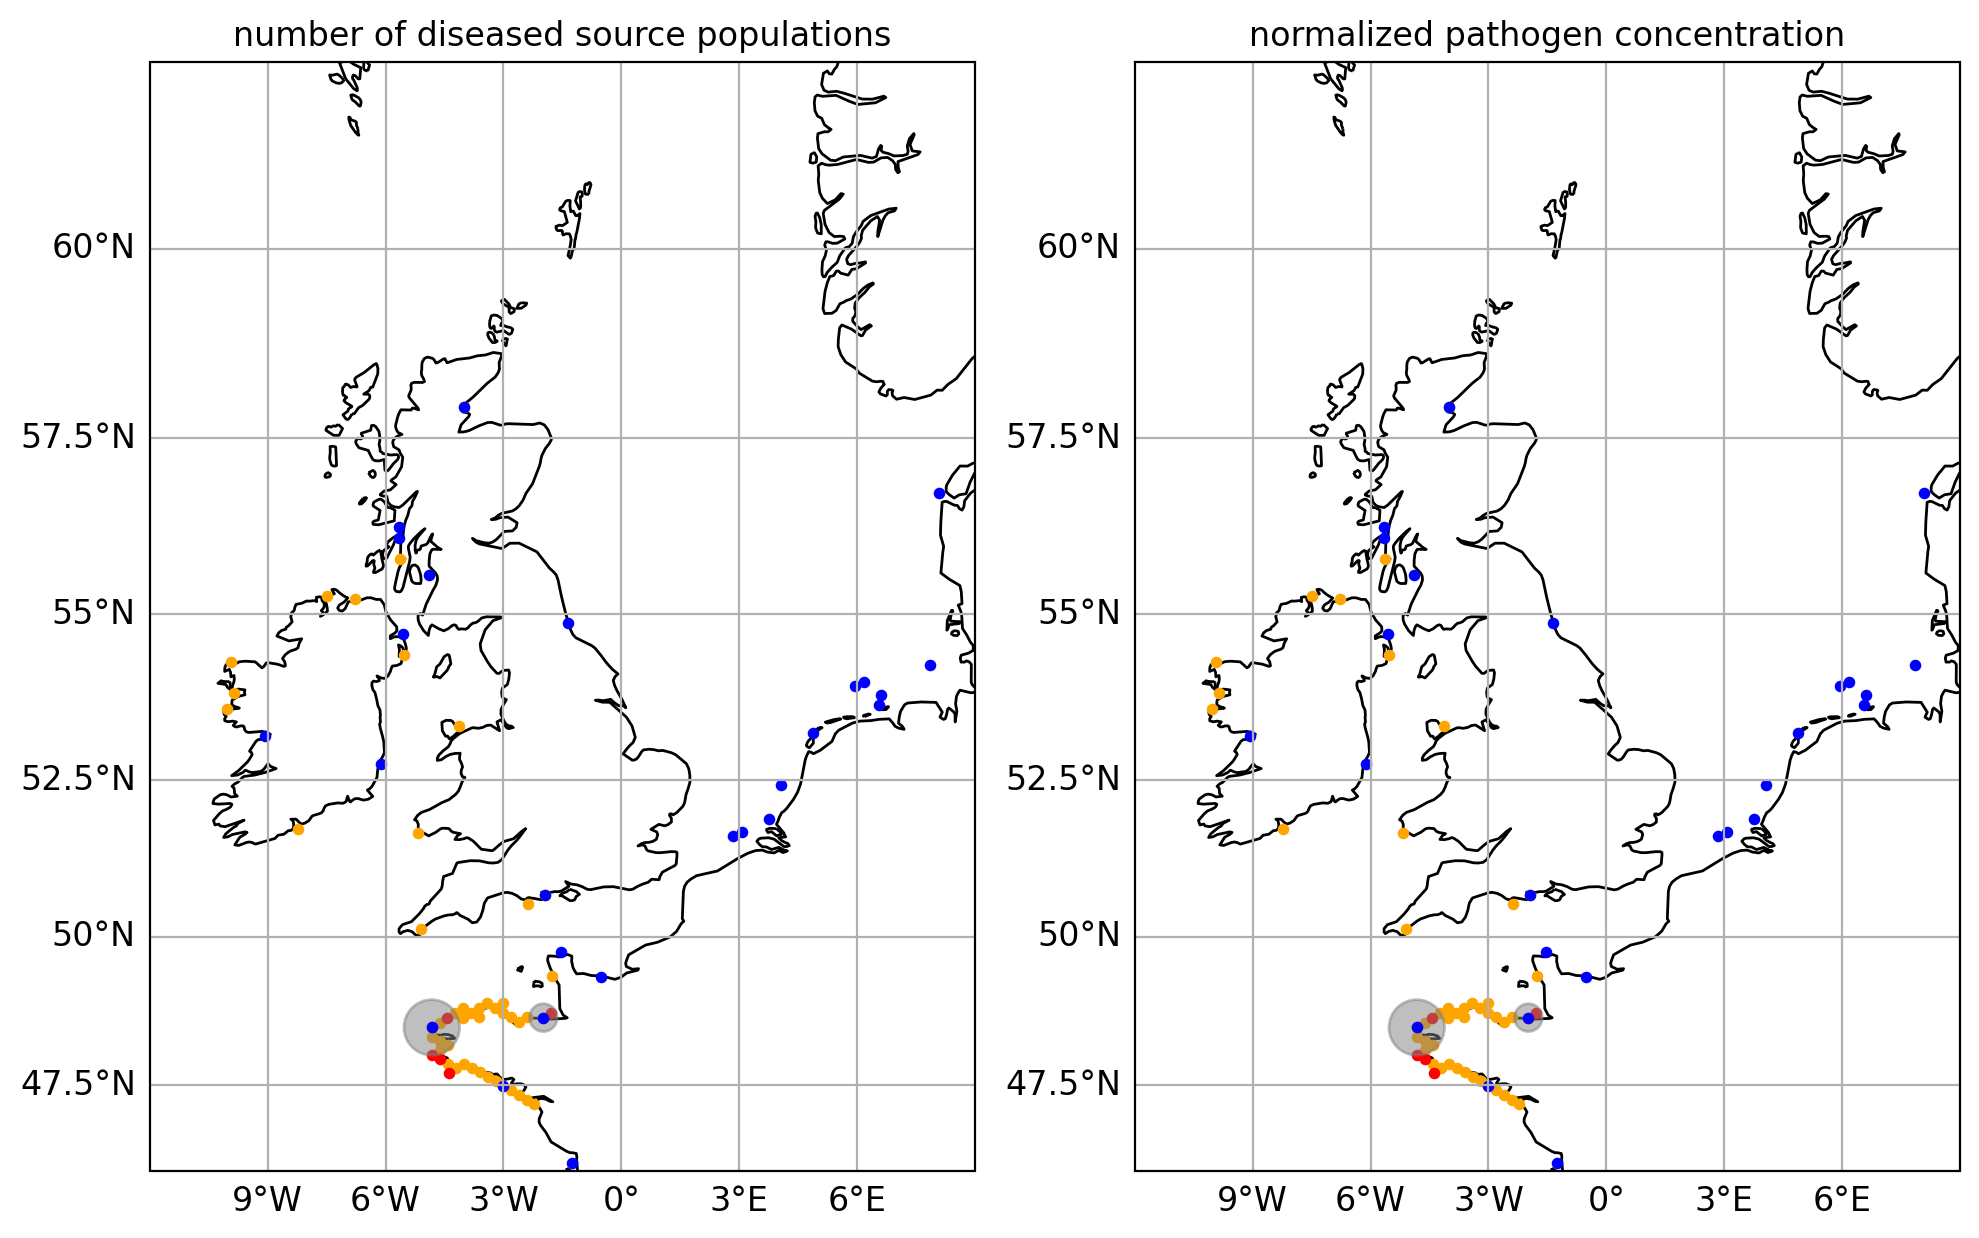

In [54]:
fig, ax = plt.subplots(
    1, 2,
    # subplot_kw={"projection": cartopy.crs.Stereographic(
    #     central_longitude=ds_conn.hex_proj__lon_origin,
    #     central_latitude=ds_conn.hex_proj__lat_origin,
    # )},
    subplot_kw={"projection": cartopy.crs.Mercator()},
    figsize=(10, 6.26),
)

fig.set_dpi(200)

fig.patch.set_alpha(0.7)

_dss_to_rst_stats = dss_to_rst_stats.copy()

_dss_to_rst_stats["rel_num_dss_sources_category"] *= 100
_dss_to_rst_stats["rel_pathogen_concentration_category"] *= 100

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

_dss_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_num_dss_sources_category",
    alpha=0.5, color="gray",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue", 
    ax=ax[0], transform=cartopy.crs.PlateCarree()
)

ax[0].coastlines(zorder=0)

ax[0].set_title("number of diseased source populations")
ax[0].set_extent([-12, 9, 46, 62])
gl1 = ax[0].gridlines(draw_labels=True)
gl1.xlabel_style = {'size': 12}
gl1.ylabel_style = {'size': 12}
gl1.top_labels=False   # suppress top labels
gl1.right_labels=False # suppress right labels;

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

_dss_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_pathogen_concentration_category",
    alpha=0.5, color="gray",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue", 
    ax=ax[1], transform=cartopy.crs.PlateCarree()
)

ax[1].coastlines(zorder=0)

ax[1].set_title("normalized pathogen concentration")
ax[1].set_extent([-12, 9, 46, 62])
gl2 = ax[1].gridlines(draw_labels=True)
gl2.xlabel_style = {'size': 12}
gl2.ylabel_style = {'size': 12}
gl2.top_labels=False   # suppress top labels
gl2.right_labels=False # suppress right labels;

fig.tight_layout();

fig.savefig("plots/041_rest-sites_risk-analsysis_15m_07-14.pdf")

### Diseased + aquaculture + historical to restoration AVERAGE 07-28

In [55]:
dssaqchis_to_rst_01y = ds_conn_28.obs_per_origin_area.where(
    (ds_conn_28.dss_count_hex0 > 0) | (ds_conn_28.his_count_hex0 > 0) | (ds_conn_28.aqc_count_hex0 > 0),
    drop=True,
).where(
    (ds_conn_28.rst_count_hex1 > 0)
)

dssaqchis_to_rst_01y

<xarray.DataArray 'obs_per_origin_area' (month: 5, year: 4, hex0: 306,
                                         hex1: 8282)> Size: 405MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * hex0       (hex0) <U47 58kB '(-1, -36, 37)' ... '(9, -58, 49)'
  * hex1       (hex1) <U47 2MB '(-1, -2, 3)' '(-1, -20, 21)' ... '(9, 9, -18)'
  * month      (month) float64 40B 0.0 1.0 2.0 3.0 4.0
  * year       (year) float64 32B 0.0 1.0 2.0 3.0
    lon_hex0   (hex0) float64 2kB -3.204 -3.199 nan ... -1.135 -1.141 -1.257
    lon_hex1   (hex1) float64 66kB -3.229 -3.215 -3.212 ... -0.8121 -0.8032
    lat_hex0   (hex0) float64 2kB 48.82 47.57 nan 58.78 ... 49.58 49.42 46.15
    lat_hex1   (hex1) float64 66kB 54.11 51.31 50.69 50.53 ... 56.27 56.43 56.58
    hex_label  (hex0) <U14 17kB '(-1, -36, 37)' ... '(9, -58, 49)'

In [56]:
known_rst_sites = ds_conn_28.rst_count_hex0.where(ds_conn_28.rst_count_hex0 > 0).to_dataset().to_pandas().dropna()
known_rst_sites

lon_hex0   lat_hex0       hex_label  rst_count_hex0
hex0                                                               
(-11, 16, -5)  -5.652154  56.105601   (-11, 16, -5)             1.0
(-11, 17, -6)  -5.662842  56.261053   (-11, 17, -6)             1.0
(-11, 7, 4)    -5.560333  54.706424     (-11, 7, 4)             1.0
(-14, -4, 18)  -6.110616  52.746676   (-14, -4, 18)             1.0
(-27, 6, 21)   -9.065311  53.176870    (-27, 6, 21)             1.0
(-4, 24, -20)  -4.011904  57.918896   (-4, 24, -20)             1.0
(-8, 11, -3)   -4.902596  55.574491    (-8, 11, -3)             1.0
(-9, -34, 43)  -4.824256  48.488479   (-9, -34, 43)             2.0
(0, -45, 45)   -3.000000  47.489861    (0, -45, 45)             1.0
(12, -39, 27)  -0.525187  49.333480   (12, -39, 27)             1.0
(27, -31, 4)    2.854403  51.626277    (27, -31, 4)             2.0
(28, -31, 3)    3.080785  51.692529    (28, -31, 3)             1.0
(31, -31, 0)    3.764009  51.888537    (31, -31, 0)             1.0
(32, -28, -4)   4.067194  52.417435   (32, -28, -4)             1.0
(35, -24, -11)  4.878878  53.225639  (35, -24, -11)             1.0
(39, -21, -18)  5.933679  53.933641  (39, -21, -18)             1.0
(40, -21, -19)  6.177440  53.993490  (40, -21, -19)             1.0
(42, -23, -19)  6.595486  53.803701  (42, -23, -19)             1.0
(42, -24, -18)  6.560140  53.649690  (42, -24, -18)             1.0
(45, -5, -40)   8.080625  56.741595   (45, -5, -40)             1.0
(47, -22, -25)  7.862873  54.244597  (47, -22, -25)             1.0
(5, -27, 22)   -1.939319  50.680946    (5, -27, 22)             1.0
(5, -40, 35)   -1.983200  48.655073    (5, -40, 35)             1.0
(7, -1, -6)    -1.364036  54.877988     (7, -1, -6)             1.0
(7, -34, 27)   -1.544287  49.741493    (7, -34, 27)             1.0
(9, -58, 49)   -1.256751  46.148070    (9, -58, 49)             1.0

In [57]:
dssaqchis_origins_01y = dssaqchis_to_rst_01y.sum(["month", "year", "hex1"]).compute().to_dataset().to_pandas()
dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] > 0).dropna()

lon_hex0   lat_hex0      hex_label  obs_per_origin_area
hex0                                                                  
(-10, 13, -3) -5.387340  55.721769  (-10, 13, -3)         19949.473684
(-11, 17, -6) -5.662842  56.261053  (-11, 17, -6)          9883.218750
(-11, 6, 5)   -5.550592  54.550942    (-11, 6, 5)           445.000000
(-11, 7, 4)   -5.560333  54.706424    (-11, 7, 4)          6353.413333
(-12, 18, -6) -5.910535  56.333420  (-12, 18, -6)          3295.972222
...                 ...        ...            ...                  ...
(6, -40, 34)  -1.777946  48.730928   (6, -40, 34)            94.486486
(7, -28, 21)  -1.515141  50.676136   (7, -28, 21)            61.620000
(7, -34, 27)  -1.544287  49.741493   (7, -34, 27)         63119.447368
(9, -35, 26)  -1.128520  49.735222   (9, -35, 26)          2519.000000
(9, -36, 27)  -1.134589  49.579428   (9, -36, 27)            28.373333

[81 rows x 4 columns]

In [58]:
dssaqchis_destinations_01y = dssaqchis_to_rst_01y.sum(["month", "year", "hex0"]).compute().to_dataset().to_pandas()
dssaqchis_destinations_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                  0.0
(-1, -20, 21) -3.215043  51.308774                  0.0
(-1, -24, 25) -3.212150  50.685757                  0.0
(-1, -25, 26) -3.211441  50.529976                  0.0
(-1, -26, 27) -3.210739  50.374185                  0.0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                  0.0
(9, 6, -15)   -0.829731  56.114857                  0.0
(9, 7, -16)   -0.820982  56.270351                  0.0
(9, 8, -17)   -0.812150  56.425843                  0.0
(9, 9, -18)   -0.803232  56.581335                  0.0

[8282 rows x 3 columns]

In [59]:
dssaqchis_origin_count_01y = (dssaqchis_to_rst_01y.sum(["month", "year"]) > 0).sum("hex0").compute().to_dataset().to_pandas()
dssaqchis_origin_count_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                    0
(-1, -20, 21) -3.215043  51.308774                    0
(-1, -24, 25) -3.212150  50.685757                    0
(-1, -25, 26) -3.211441  50.529976                    0
(-1, -26, 27) -3.210739  50.374185                    0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                    0
(9, 6, -15)   -0.829731  56.114857                    0
(9, 7, -16)   -0.820982  56.270351                    0
(9, 8, -17)   -0.812150  56.425843                    0
(9, 9, -18)   -0.803232  56.581335                    0

[8282 rows x 3 columns]

In [60]:
dssaqchis_to_rst_stats = (
    dssaqchis_origin_count_01y
    .where(dssaqchis_origin_count_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"lon_hex1": "lon", "lat_hex1": "lat", "obs_per_origin_area": "num_dss_sources"})
)

dssaqchis_to_rst_stats = dssaqchis_to_rst_stats.join(
    dssaqchis_destinations_01y
    .where(dssaqchis_destinations_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"obs_per_origin_area": "rel_pathogen_concentration"})
    [["rel_pathogen_concentration"]]
)

dssaqchis_to_rst_stats["rel_pathogen_concentration"] /= dssaqchis_to_rst_stats["rel_pathogen_concentration"].max()

dssaqchis_to_rst_stats["rel_num_dss_sources"] = dssaqchis_to_rst_stats["num_dss_sources"] / dssaqchis_to_rst_stats["num_dss_sources"].max()

dssaqchis_to_rst_stats.where(dssaqchis_to_rst_stats.rel_pathogen_concentration > 0).dropna()

lon        lat  num_dss_sources  \
hex1                                                   
(-11, 7, 4)    -5.560333  54.706424             14.0   
(7, -34, 27)   -1.544287  49.741493             14.0   
(27, -31, 4)    2.854403  51.626277             13.0   
(28, -31, 3)    3.080785  51.692529             11.0   
(-9, -34, 43)  -4.824256  48.488479              8.0   
(40, -21, -19)  6.177440  53.993490              7.0   
(47, -22, -25)  7.862873  54.244597              6.0   
(42, -23, -19)  6.595486  53.803701              6.0   
(-8, 11, -3)   -4.902596  55.574491              6.0   
(42, -24, -18)  6.560140  53.649690              5.0   
(5, -40, 35)   -1.983200  48.655073              5.0   
(-14, -4, 18)  -6.110616  52.746676              5.0   
(39, -21, -18)  5.933679  53.933641              4.0   
(31, -31, 0)    3.764009  51.888537              4.0   
(5, -27, 22)   -1.939319  50.680946              3.0   
(12, -39, 27)  -0.525187  49.333480              3.0   
(-11, 16, -5)  -5.652154  56.105601              2.0   
(-27, 6, 21)   -9.065311  53.176870              2.0   
(-11, 17, -6)  -5.662842  56.261053              2.0   
(7, -1, -6)    -1.364036  54.877988              2.0   
(-4, 24, -20)  -4.011904  57.918896              1.0   

                rel_pathogen_concentration  rel_num_dss_sources  
hex1                                                             
(-11, 7, 4)                       0.069500             1.000000  
(7, -34, 27)                      0.212407             1.000000  
(27, -31, 4)                      1.000000             0.928571  
(28, -31, 3)                      0.418720             0.785714  
(-9, -34, 43)                     0.001770             0.571429  
(40, -21, -19)                    0.131100             0.500000  
(47, -22, -25)                    0.163853             0.428571  
(42, -23, -19)                    0.252631             0.428571  
(-8, 11, -3)                      0.098105             0.428571  
(42, -24, -18)                    0.001605             0.357143  
(5, -40, 35)                      0.000660             0.357143  
(-14, -4, 18)                     0.538185             0.357143  
(39, -21, -18)                    0.188735             0.285714  
(31, -31, 0)                      0.001153             0.285714  
(5, -27, 22)                      0.000244             0.214286  
(12, -39, 27)                     0.001108             0.214286  
(-11, 16, -5)                     0.000014             0.142857  
(-27, 6, 21)                      0.000571             0.142857  
(-11, 17, -6)                     0.024264             0.142857  
(7, -1, -6)                       0.007161             0.142857  
(-4, 24, -20)                     0.000158             0.071429

In [61]:
dssaqchis_to_rst_stats.num_dss_sources.unique()

array([14., 13., 11.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [62]:
dssaqchis_to_rst_stats["rel_num_dss_sources_category"] = pd.cut(
    dssaqchis_to_rst_stats.rel_num_dss_sources,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)
dssaqchis_to_rst_stats["rel_pathogen_concentration_category"] = pd.cut(
    dssaqchis_to_rst_stats.rel_pathogen_concentration,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)

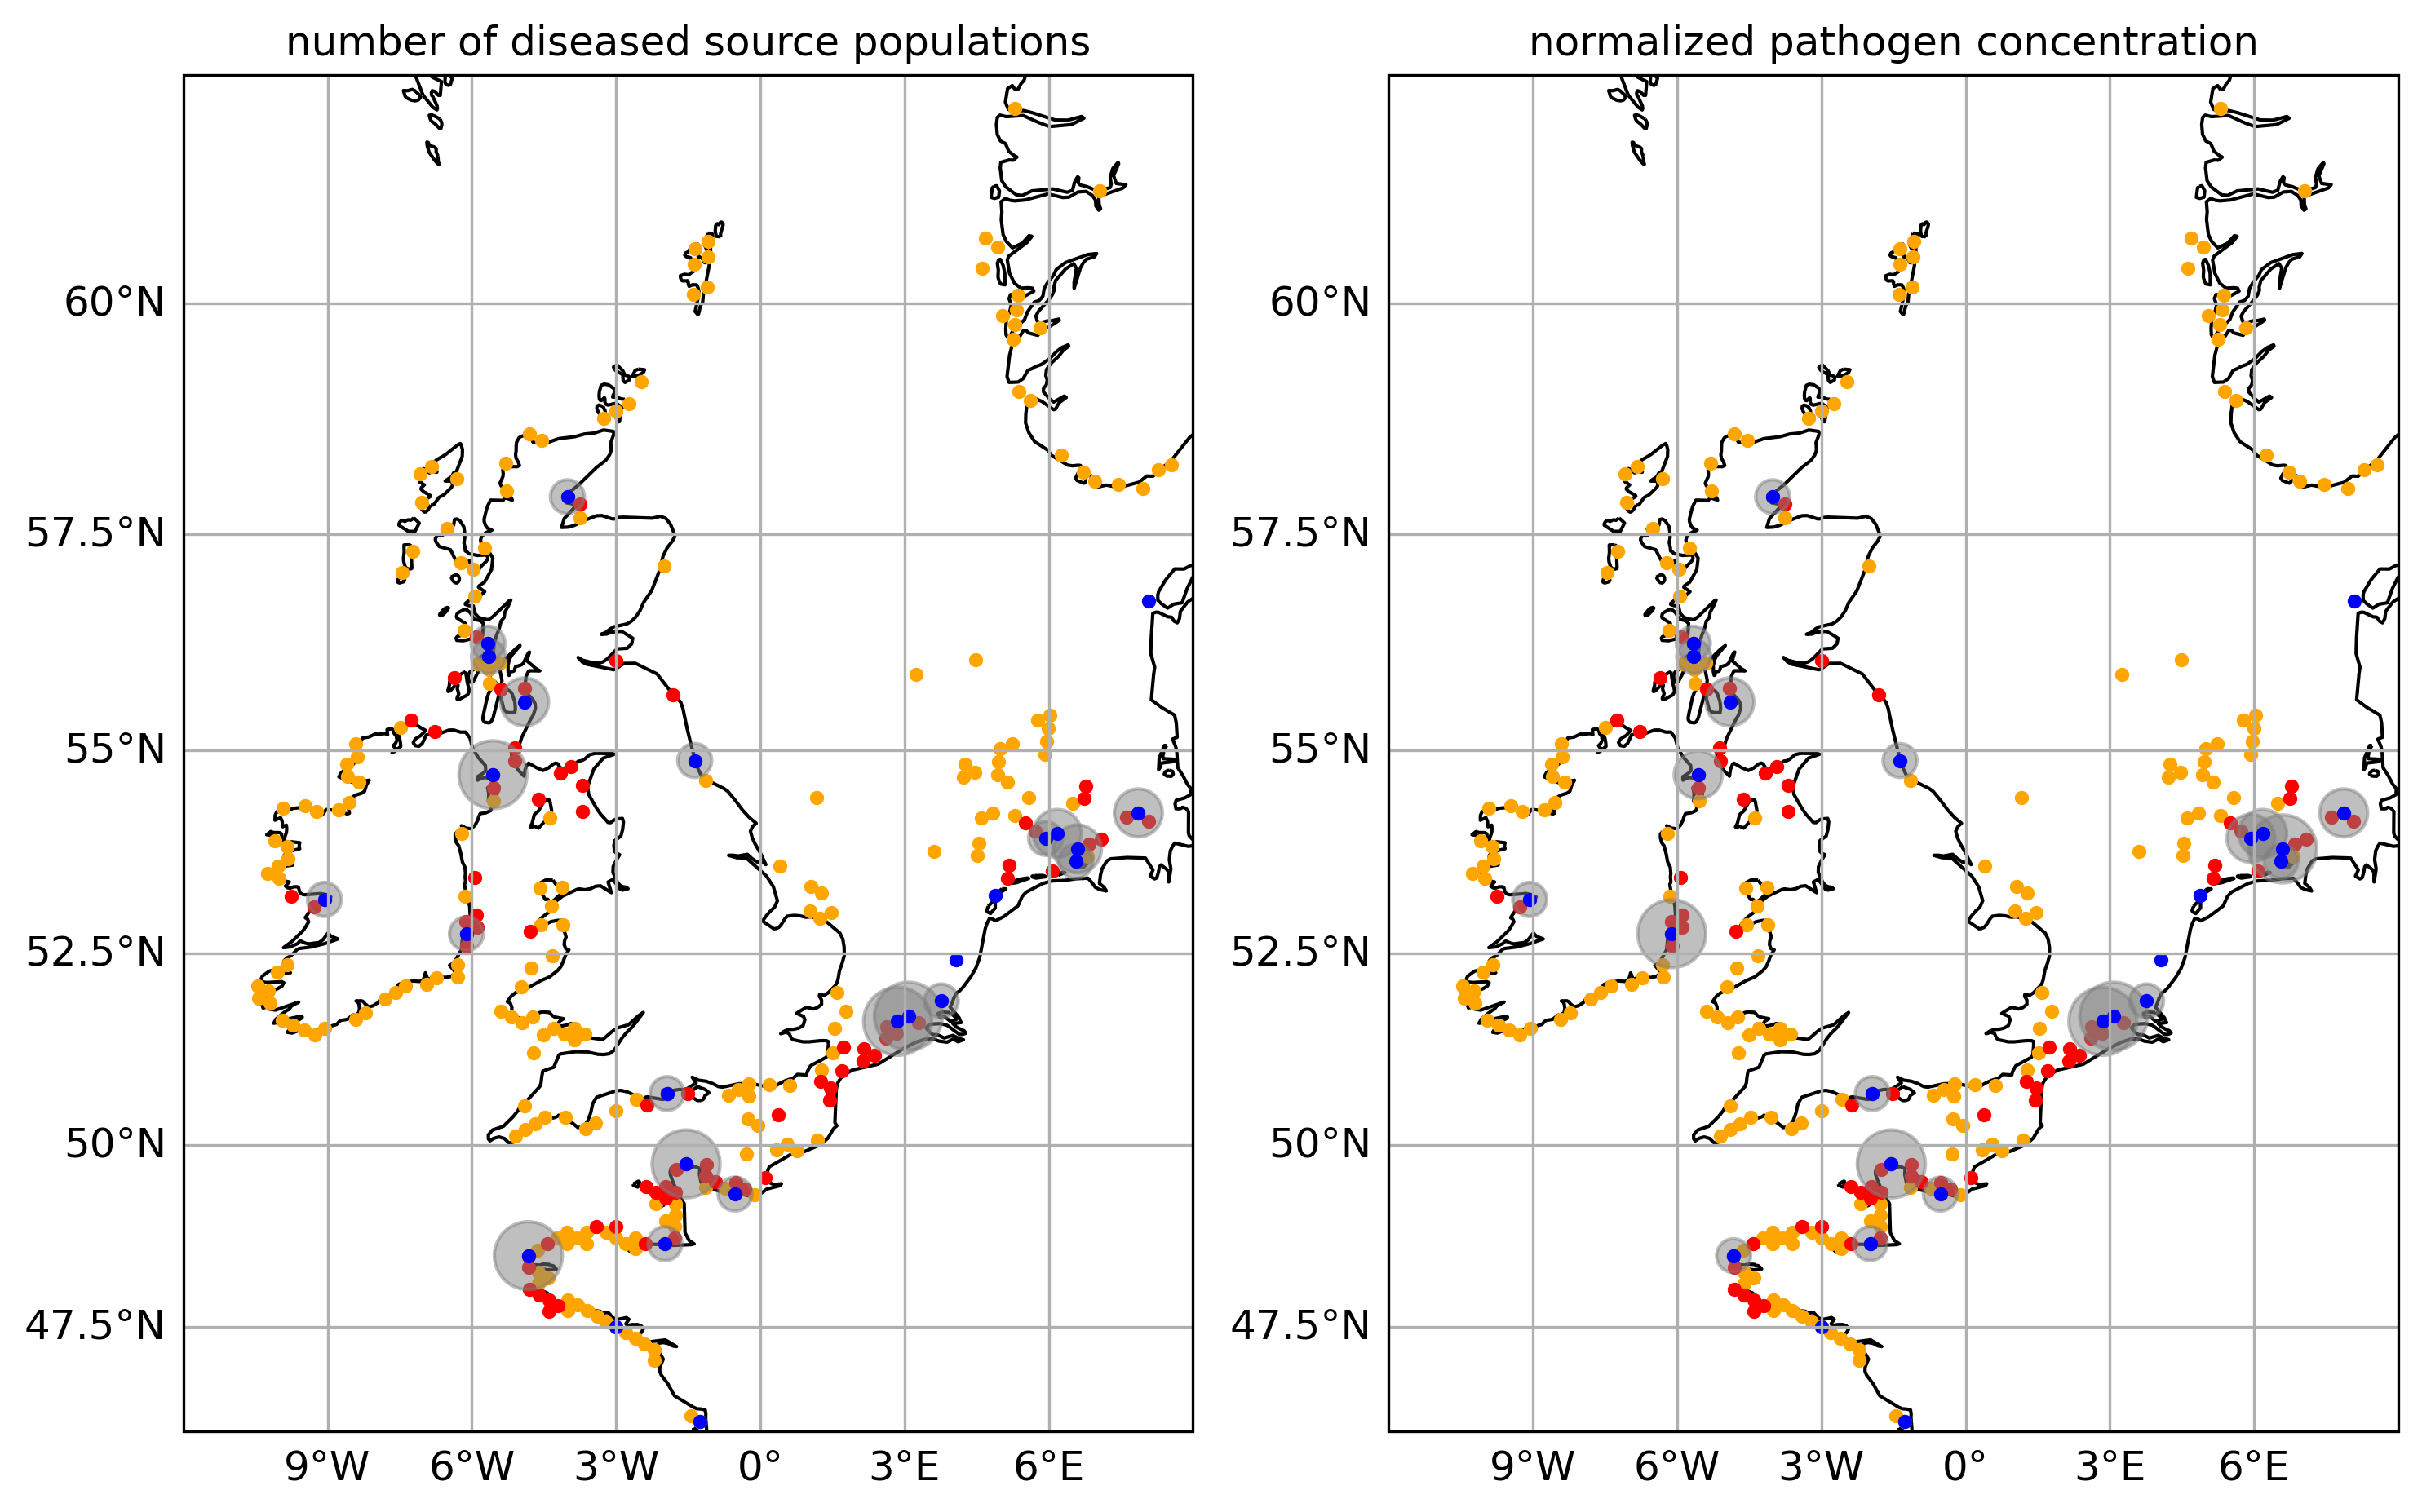

In [63]:
fig, ax = plt.subplots(
    1, 2,
    # subplot_kw={"projection": cartopy.crs.Stereographic(
    #     central_longitude=ds_conn.hex_proj__lon_origin,
    #     central_latitude=ds_conn.hex_proj__lat_origin,
    # )},
    subplot_kw={"projection": cartopy.crs.Mercator()},
    figsize=(10, 6.26),
)

fig.set_dpi(300)

fig.patch.set_alpha(0.7)

_dssaqchis_to_rst_stats = dssaqchis_to_rst_stats.copy()

_dssaqchis_to_rst_stats["rel_num_dss_sources_category"] *= 100
_dssaqchis_to_rst_stats["rel_pathogen_concentration_category"] *= 100

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

_dssaqchis_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_num_dss_sources_category",
    alpha=0.5, color="gray",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue",
    ax=ax[0], transform=cartopy.crs.PlateCarree()
)

ax[0].coastlines(zorder=0)

ax[0].set_title("number of diseased source populations")
ax[0].set_extent([-12, 9, 46, 62])
gl1 = ax[0].gridlines(draw_labels=True)
gl1.xlabel_style = {'size': 12}
gl1.ylabel_style = {'size': 12}
gl1.top_labels=False   # suppress top labels
gl1.right_labels=False # suppress right labels;

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

_dssaqchis_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_pathogen_concentration_category",
    alpha=0.5, color="gray",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue",
    ax=ax[1], transform=cartopy.crs.PlateCarree()
)

ax[1].coastlines(zorder=0)

ax[1].set_title("normalized pathogen concentration")
ax[1].set_extent([-12, 9, 46, 62])
gl2 = ax[1].gridlines(draw_labels=True)
gl2.xlabel_style = {'size': 12}
gl2.ylabel_style = {'size': 12}
gl2.top_labels=False   # suppress top labels
gl2.right_labels=False # suppress right labels;

fig.tight_layout();

fig.savefig("plots/041_rest-sites_risk-analsysis_dssaqchis_15m_07-28.pdf")

### Diseased to Restoration AVERAGE 07-28

In [64]:
dss_to_rst_01y = ds_conn_28.obs_per_origin_area.where(
    (ds_conn_28.dss_count_hex0 > 0),
    drop=True,
).where(
    (ds_conn_28.rst_count_hex1 > 0)
)

dss_to_rst_01y

<xarray.DataArray 'obs_per_origin_area' (month: 5, year: 4, hex0: 55, hex1: 8282)> Size: 73MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * hex0       (hex0) <U47 10kB '(-1, -36, 37)' ... '(6, -40, 34)'
  * hex1       (hex1) <U47 2MB '(-1, -2, 3)' '(-1, -20, 21)' ... '(9, 9, -18)'
  * month      (month) float64 40B 0.0 1.0 2.0 3.0 4.0
  * year       (year) float64 32B 0.0 1.0 2.0 3.0
    lon_hex0   (hex0) float64 440B -3.204 -3.199 -5.168 ... -1.983 -1.762 -1.778
    lon_hex1   (hex1) float64 66kB -3.229 -3.215 -3.212 ... -0.8121 -0.8032
    lat_hex0   (hex0) float64 440B 48.82 47.57 51.68 50.12 ... 48.66 49.35 48.73
    lat_hex1   (hex1) float64 66kB 54.11 51.31 50.69 50.53 ... 56.27 56.43 56.58
    hex_label  (hex0) <U14 3kB '(-1, -36, 37)' ... '(6, -40, 34)'

In [65]:
known_rst_sites = ds_conn_28.rst_count_hex0.where(ds_conn_28.rst_count_hex0 > 0).to_dataset().to_pandas().dropna()
known_rst_sites

lon_hex0   lat_hex0       hex_label  rst_count_hex0
hex0                                                               
(-11, 16, -5)  -5.652154  56.105601   (-11, 16, -5)             1.0
(-11, 17, -6)  -5.662842  56.261053   (-11, 17, -6)             1.0
(-11, 7, 4)    -5.560333  54.706424     (-11, 7, 4)             1.0
(-14, -4, 18)  -6.110616  52.746676   (-14, -4, 18)             1.0
(-27, 6, 21)   -9.065311  53.176870    (-27, 6, 21)             1.0
(-4, 24, -20)  -4.011904  57.918896   (-4, 24, -20)             1.0
(-8, 11, -3)   -4.902596  55.574491    (-8, 11, -3)             1.0
(-9, -34, 43)  -4.824256  48.488479   (-9, -34, 43)             2.0
(0, -45, 45)   -3.000000  47.489861    (0, -45, 45)             1.0
(12, -39, 27)  -0.525187  49.333480   (12, -39, 27)             1.0
(27, -31, 4)    2.854403  51.626277    (27, -31, 4)             2.0
(28, -31, 3)    3.080785  51.692529    (28, -31, 3)             1.0
(31, -31, 0)    3.764009  51.888537    (31, -31, 0)             1.0
(32, -28, -4)   4.067194  52.417435   (32, -28, -4)             1.0
(35, -24, -11)  4.878878  53.225639  (35, -24, -11)             1.0
(39, -21, -18)  5.933679  53.933641  (39, -21, -18)             1.0
(40, -21, -19)  6.177440  53.993490  (40, -21, -19)             1.0
(42, -23, -19)  6.595486  53.803701  (42, -23, -19)             1.0
(42, -24, -18)  6.560140  53.649690  (42, -24, -18)             1.0
(45, -5, -40)   8.080625  56.741595   (45, -5, -40)             1.0
(47, -22, -25)  7.862873  54.244597  (47, -22, -25)             1.0
(5, -27, 22)   -1.939319  50.680946    (5, -27, 22)             1.0
(5, -40, 35)   -1.983200  48.655073    (5, -40, 35)             1.0
(7, -1, -6)    -1.364036  54.877988     (7, -1, -6)             1.0
(7, -34, 27)   -1.544287  49.741493    (7, -34, 27)             1.0
(9, -58, 49)   -1.256751  46.148070    (9, -58, 49)             1.0

In [66]:
dss_origins_01y = dss_to_rst_01y.sum(["month", "year", "hex1"]).compute().to_dataset().to_pandas()
dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).dropna()

lon_hex0   lat_hex0      hex_label  obs_per_origin_area
hex0                                                                  
(-16, 13, 3)  -6.772943  55.220104   (-16, 13, 3)           834.657534
(-2, -35, 37) -3.408674  48.892978  (-2, -35, 37)            43.581081
(-6, -40, 46) -4.199435  47.795198  (-6, -40, 46)            33.782609
(-7, -34, 41) -4.423439  48.650487  (-7, -34, 41)             2.419355
(-7, -39, 46) -4.401451  47.870756  (-7, -39, 46)             9.240000
(-7, -40, 47) -4.397155  47.714762  (-7, -40, 47)            67.000000
(-8, -38, 46) -4.604073  47.945926  (-8, -38, 46)           135.666667
(-9, -34, 43) -4.824256  48.488479  (-9, -34, 43)           391.071429
(-9, -35, 44) -4.818560  48.332570  (-9, -35, 44)            50.909091
(-9, -37, 46) -4.807300  48.020705  (-9, -37, 46)           270.857143
(0, -36, 36)  -3.000000  48.893746   (0, -36, 36)            22.500000
(3, -27, 24)  -2.365689  50.528379   (3, -27, 24)            23.070423
(3, -39, 36)  -2.389897  48.658131   (3, -39, 36)            11.162791
(5, -27, 22)  -1.939319  50.680946   (5, -27, 22)            47.600000
(6, -36, 30)  -1.762264  49.354450   (6, -36, 30)            72.763158
(6, -40, 34)  -1.777946  48.730928   (6, -40, 34)            94.486486

In [67]:
dss_destinations_01y = dss_to_rst_01y.sum(["month", "year", "hex0"]).compute().to_dataset().to_pandas()
dss_destinations_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                  0.0
(-1, -20, 21) -3.215043  51.308774                  0.0
(-1, -24, 25) -3.212150  50.685757                  0.0
(-1, -25, 26) -3.211441  50.529976                  0.0
(-1, -26, 27) -3.210739  50.374185                  0.0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                  0.0
(9, 6, -15)   -0.829731  56.114857                  0.0
(9, 7, -16)   -0.820982  56.270351                  0.0
(9, 8, -17)   -0.812150  56.425843                  0.0
(9, 9, -18)   -0.803232  56.581335                  0.0

[8282 rows x 3 columns]

In [68]:
dss_origin_count_01y = (dss_to_rst_01y.sum(["month", "year"]) > 0).sum("hex0").compute().to_dataset().to_pandas()
dss_origin_count_01y

lon_hex1   lat_hex1  obs_per_origin_area
hex1                                                   
(-1, -2, 3)   -3.229353  54.110720                    0
(-1, -20, 21) -3.215043  51.308774                    0
(-1, -24, 25) -3.212150  50.685757                    0
(-1, -25, 26) -3.211441  50.529976                    0
(-1, -26, 27) -3.210739  50.374185                    0
...                 ...        ...                  ...
(9, 5, -14)   -0.838398  55.959362                    0
(9, 6, -15)   -0.829731  56.114857                    0
(9, 7, -16)   -0.820982  56.270351                    0
(9, 8, -17)   -0.812150  56.425843                    0
(9, 9, -18)   -0.803232  56.581335                    0

[8282 rows x 3 columns]

In [69]:
dss_to_rst_stats = (
    dss_origin_count_01y
    .where(dss_origin_count_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"lon_hex1": "lon", "lat_hex1": "lat", "obs_per_origin_area": "num_dss_sources"})
)

dss_to_rst_stats = dss_to_rst_stats.join(
    dss_destinations_01y
    .where(dss_destinations_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"obs_per_origin_area": "rel_pathogen_concentration"})
    [["rel_pathogen_concentration"]]
)

dss_to_rst_stats["rel_pathogen_concentration"] /= dss_to_rst_stats["rel_pathogen_concentration"].max()

dss_to_rst_stats["rel_num_dss_sources"] = dss_to_rst_stats["num_dss_sources"] / dss_to_rst_stats["num_dss_sources"].max()

dss_to_rst_stats.where(dss_to_rst_stats.rel_pathogen_concentration > 0).dropna()

lon        lat  num_dss_sources  \
hex1                                                  
(-9, -34, 43) -4.824256  48.488479              8.0   
(7, -34, 27)  -1.544287  49.741493              3.0   
(5, -27, 22)  -1.939319  50.680946              2.0   
(5, -40, 35)  -1.983200  48.655073              2.0   
(-11, 7, 4)   -5.560333  54.706424              1.0   

               rel_pathogen_concentration  rel_num_dss_sources  
hex1                                                            
(-9, -34, 43)                    1.000000                1.000  
(7, -34, 27)                     0.144487                0.375  
(5, -27, 22)                     0.073543                0.250  
(5, -40, 35)                     0.109943                0.250  
(-11, 7, 4)                      0.868579                0.125

In [70]:
import pandas as pd

In [71]:
dss_to_rst_stats.num_dss_sources.unique()

array([8., 3., 2., 1.])

In [72]:
dss_to_rst_stats["rel_num_dss_sources_category"] = pd.cut(
    dss_to_rst_stats.rel_num_dss_sources,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)
dss_to_rst_stats["rel_pathogen_concentration_category"] = pd.cut(
    dss_to_rst_stats.rel_pathogen_concentration,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)

In [73]:
dss_to_rst_stats

lon        lat  num_dss_sources  \
hex1                                                  
(-9, -34, 43) -4.824256  48.488479              8.0   
(7, -34, 27)  -1.544287  49.741493              3.0   
(5, -27, 22)  -1.939319  50.680946              2.0   
(5, -40, 35)  -1.983200  48.655073              2.0   
(-11, 7, 4)   -5.560333  54.706424              1.0   

               rel_pathogen_concentration  rel_num_dss_sources  \
hex1                                                             
(-9, -34, 43)                    1.000000                1.000   
(7, -34, 27)                     0.144487                0.375   
(5, -27, 22)                     0.073543                0.250   
(5, -40, 35)                     0.109943                0.250   
(-11, 7, 4)                      0.868579                0.125   

               rel_num_dss_sources_category  \
hex1                                          
(-9, -34, 43)                           4.0   
(7, -34, 27)                            2.0   
(5, -27, 22)                            1.0   
(5, -40, 35)                            1.0   
(-11, 7, 4)                             1.0   

               rel_pathogen_concentration_category  
hex1                                                
(-9, -34, 43)                                  4.0  
(7, -34, 27)                                   1.0  
(5, -27, 22)                                   1.0  
(5, -40, 35)                                   1.0  
(-11, 7, 4)                                    2.0

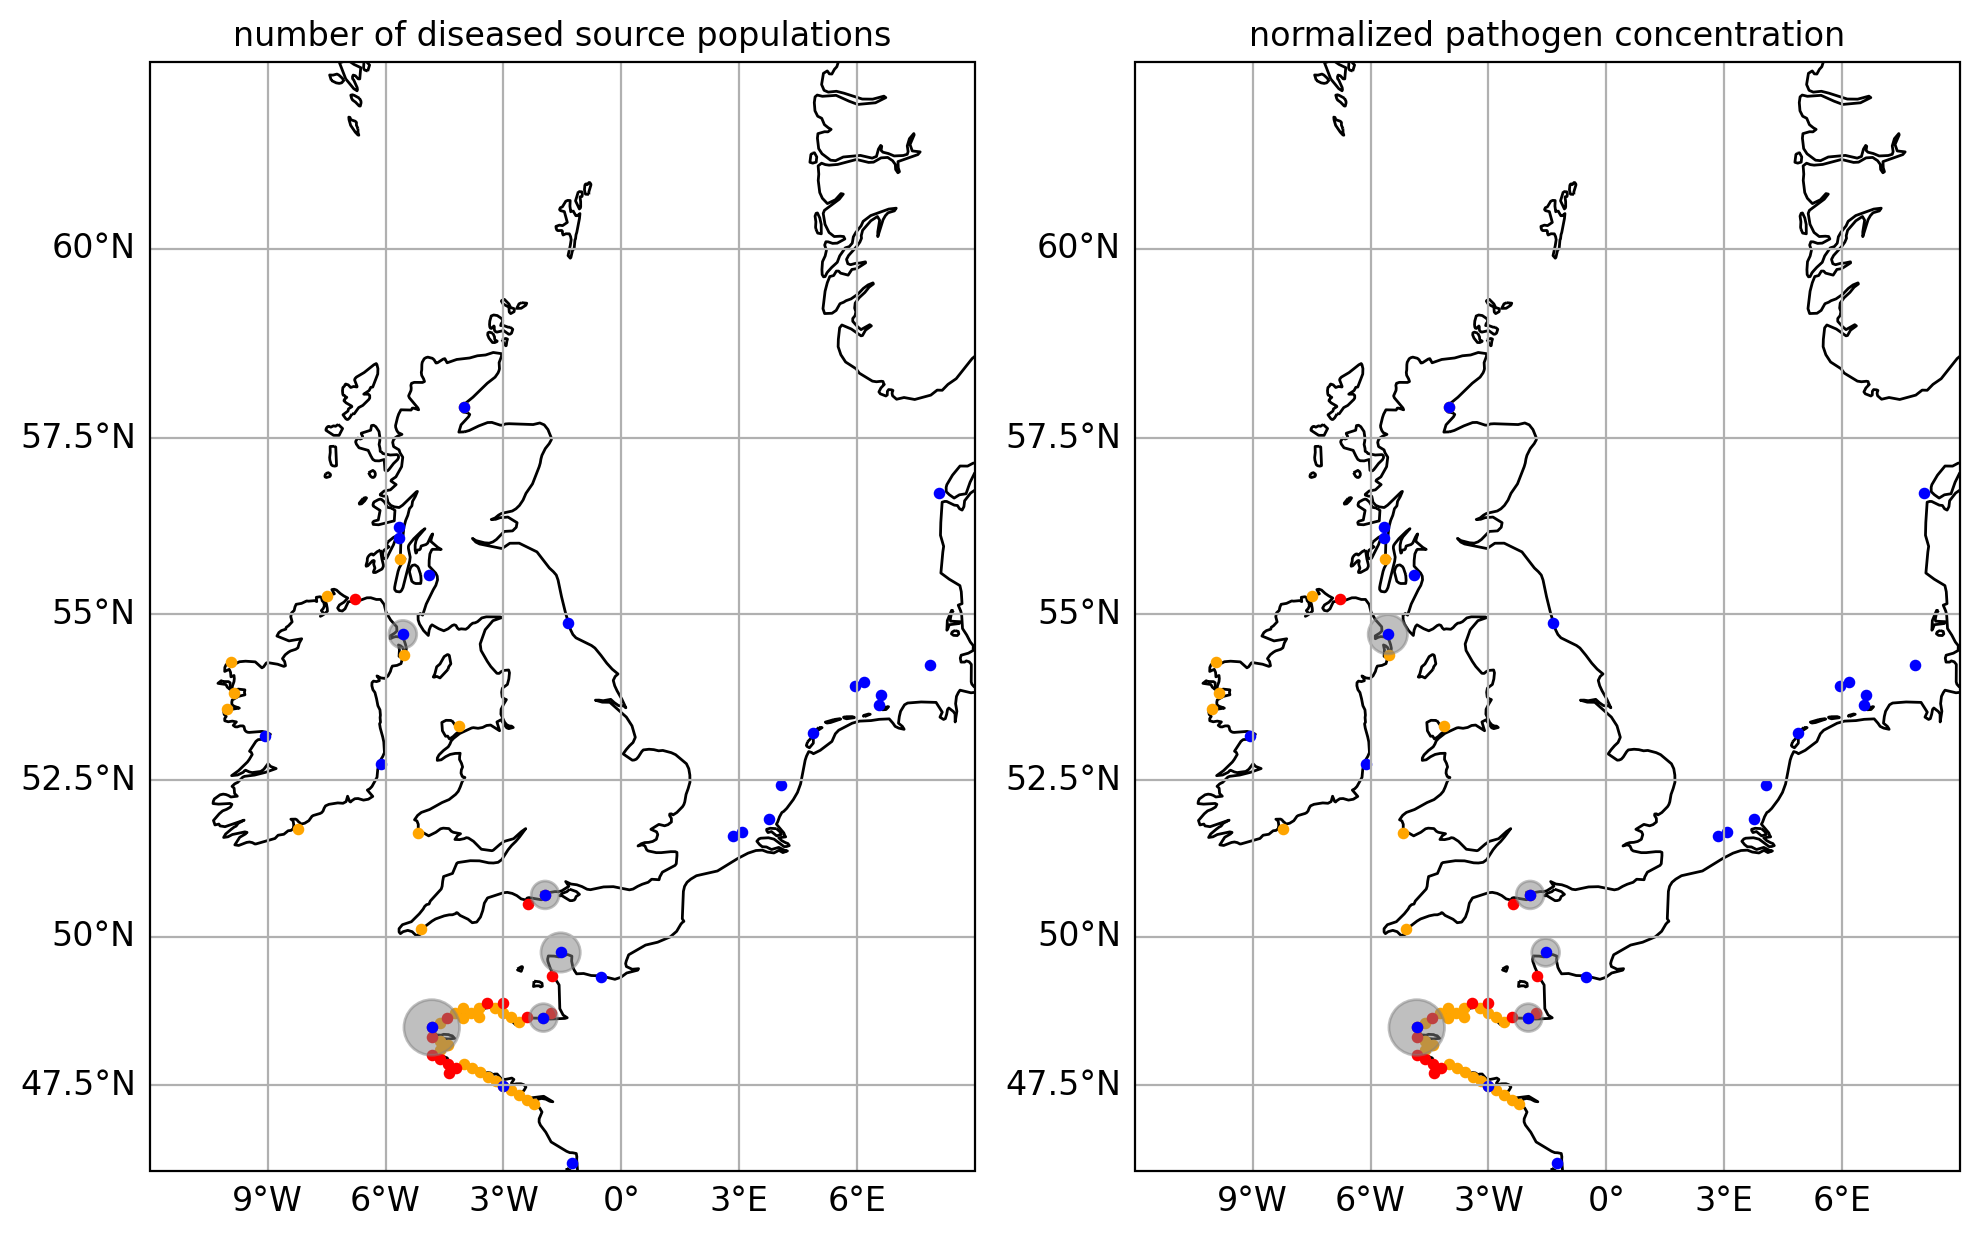

In [74]:
fig, ax = plt.subplots(
    1, 2,
    # subplot_kw={"projection": cartopy.crs.Stereographic(
    #     central_longitude=ds_conn.hex_proj__lon_origin,
    #     central_latitude=ds_conn.hex_proj__lat_origin,
    # )},
    subplot_kw={"projection": cartopy.crs.Mercator()},
    figsize=(10, 6.26),
)

fig.set_dpi(200)

fig.patch.set_alpha(0.7)

_dss_to_rst_stats = dss_to_rst_stats.copy()

_dss_to_rst_stats["rel_num_dss_sources_category"] *= 100
_dss_to_rst_stats["rel_pathogen_concentration_category"] *= 100

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

_dss_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_num_dss_sources_category",
    alpha=0.5, color="gray",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue", 
    ax=ax[0], transform=cartopy.crs.PlateCarree()
)

ax[0].coastlines(zorder=0)

ax[0].set_title("number of diseased source populations")
ax[0].set_extent([-12, 9, 46, 62])
gl1 = ax[0].gridlines(draw_labels=True)
gl1.xlabel_style = {'size': 12}
gl1.ylabel_style = {'size': 12}
gl1.top_labels=False   # suppress top labels
gl1.right_labels=False # suppress right labels;

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

_dss_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_pathogen_concentration_category",
    alpha=0.5, color="gray",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue", 
    ax=ax[1], transform=cartopy.crs.PlateCarree()
)

ax[1].coastlines(zorder=0)

ax[1].set_title("normalized pathogen concentration")
ax[1].set_extent([-12, 9, 46, 62])
gl2 = ax[1].gridlines(draw_labels=True)
gl2.xlabel_style = {'size': 12}
gl2.ylabel_style = {'size': 12}
gl2.top_labels=False   # suppress top labels
gl2.right_labels=False # suppress right labels;

fig.tight_layout();

fig.savefig("plots/041_rest-sites_risk-analsysis_15m_07-28.pdf")

### Diseased + aquaculture + historical to restoration PER MONTH AND YEAR

In [55]:
dssaqchis_to_rst_01y = ds_conn.obs_per_origin_area.where(
    (ds_conn.dss_count_hex0 > 0) | (ds_conn.his_count_hex0 > 0) | (ds_conn.aqc_count_hex0 > 0),
    drop=True,
).where(
    (ds_conn.rst_count_hex1 > 0)
)

dssaqchis_to_rst_01y

NameError: name 'ds_conn' is not defined

In [56]:
year_name_mapping = {
    0: '2019',
    1: '2020',
    2: '2021',
    3: '2022',
}

month_name_mapping = {
    0: 'May',
    1: 'June',
    2: 'July',
    3: 'August',
    4: 'September',
}

# Apply the mappings to the xarray dataset
dssaqchis_to_rst_01y['year'] = [year_name_mapping.get(y, y) for y in dssaqchis_to_rst_01y['year'].values]
dssaqchis_to_rst_01y['month'] = [month_name_mapping.get(m, m) for m in dssaqchis_to_rst_01y['month'].values]

# Print the updated xarray dataset
dssaqchis_to_rst_01y

<xarray.DataArray 'obs_per_origin_area' (month: 5, year: 4, hex0: 365,
                                         hex1: 8401)> Size: 491MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * hex0       (hex0) <U47 69kB '(-1, -36, 37)' ... '(9, -59, 50)'
  * hex1       (hex1) <U47 2MB '(-1, -19, 20)' '(-1, -2, 3)' ... '(9, 9, -18)'
    lon_hex0   (hex0) float64 3kB -3.204 -3.2 -3.199 ... -1.252 -1.257 -1.262
    lon_hex1   (hex1) float64 67kB -3.216 -3.229 -3.215 ... -0.8121 -0.8032
    lat_hex0   (hex0) float64 3kB 48.82 47.72 47.57 53.49 ... 46.3 46.15 45.99
    lat_hex1   (hex1) float64 67kB 51.46 54.11 51.31 51.15 ... 56.27 56.43 56.58
    hex_label  (hex0) <U14 20kB '(-1, -36, 37)' ... '(9, -59, 50)'
  * year       (year) <U4 64B '2019' '2020' '2021' '2022'
  * month      (month) <U9 180B 'May' 'June' 'July' 'August' 'September'

In [57]:
known_rst_sites = ds_conn.rst_count_hex0.where(ds_conn.rst_count_hex0 > 0).to_dataset().to_pandas().dropna()
known_rst_sites

NameError: name 'ds_conn' is not defined

In [58]:
dssaqchis_origins_01y = dssaqchis_to_rst_01y.sum(["hex1"]).compute().to_dataframe().reset_index(level=['year', 'month','hex0'])
dssaqchis_origins_01y.where(dssaqchis_origins_01y["obs_per_origin_area"] > 0).dropna()

month  year           hex0  lon_hex0   lat_hex0      hex_label  \
2           May  2019  (-1, -44, 45) -3.199006  47.567702  (-1, -44, 45)   
9           May  2019  (-10, 13, -3) -5.387340  55.721769  (-10, 13, -3)   
18          May  2019    (-11, 6, 5) -5.550592  54.550942    (-11, 6, 5)   
19          May  2019    (-11, 7, 4) -5.560333  54.706424    (-11, 7, 4)   
24          May  2019  (-13, -3, 16) -5.904284  52.985637  (-13, -3, 16)   
...         ...   ...            ...       ...        ...            ...   
6912  September  2021   (6, -39, 33) -1.774072  48.886829   (6, -39, 33)   
6913  September  2021   (6, -40, 34) -1.777946  48.730928   (6, -40, 34)   
6917  September  2021   (7, -28, 21) -1.515141  50.676136   (7, -28, 21)   
6918  September  2021   (7, -34, 27) -1.544287  49.741493   (7, -34, 27)   
6921  September  2021   (7, -40, 33) -1.572059  48.806387   (7, -40, 33)   

      obs_per_origin_area  
2              249.407407  
9              399.473684  
18              20.096774  
19             179.186667  
24             980.962963  
...                   ...  
6912            30.000000  
6913             7.189189  
6917            79.000000  
6918           828.236842  
6921            32.000000  

[1093 rows x 7 columns]

In [59]:
dssaqchis_origin_count_01y = (dssaqchis_to_rst_01y > 0).sum("hex0").compute().to_dataframe().reset_index(level=['year', 'month','hex1']) #origins per hex1
dssaqchis_origin_count_01y

month  year           hex1  lon_hex1   lat_hex1  \
0             May  2019  (-1, -19, 20) -3.215782  51.464504   
1             May  2019    (-1, -2, 3) -3.229353  54.110720   
2             May  2019  (-1, -20, 21) -3.215043  51.308774   
3             May  2019  (-1, -21, 22) -3.214311  51.153035   
4             May  2019  (-1, -24, 25) -3.212150  50.685757   
...           ...   ...            ...       ...        ...   
168015  September  2022    (9, 5, -14) -0.838398  55.959362   
168016  September  2022    (9, 6, -15) -0.829731  56.114857   
168017  September  2022    (9, 7, -16) -0.820982  56.270351   
168018  September  2022    (9, 8, -17) -0.812150  56.425843   
168019  September  2022    (9, 9, -18) -0.803232  56.581335   

        obs_per_origin_area  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
168015                    0  
168016                    0  
168017                    0  
168018                    0  
168019                    0  

[168020 rows x 6 columns]

In [60]:
dssaqchis_destinations_01y = dssaqchis_to_rst_01y.sum(["hex0"]).compute().to_dataframe().reset_index(level=['year', 'month','hex1'])
dssaqchis_destinations_01y

month  year           hex1  lon_hex1   lat_hex1  \
0             May  2019  (-1, -19, 20) -3.215782  51.464504   
1             May  2019    (-1, -2, 3) -3.229353  54.110720   
2             May  2019  (-1, -20, 21) -3.215043  51.308774   
3             May  2019  (-1, -21, 22) -3.214311  51.153035   
4             May  2019  (-1, -24, 25) -3.212150  50.685757   
...           ...   ...            ...       ...        ...   
168015  September  2022    (9, 5, -14) -0.838398  55.959362   
168016  September  2022    (9, 6, -15) -0.829731  56.114857   
168017  September  2022    (9, 7, -16) -0.820982  56.270351   
168018  September  2022    (9, 8, -17) -0.812150  56.425843   
168019  September  2022    (9, 9, -18) -0.803232  56.581335   

        obs_per_origin_area  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
168015                  0.0  
168016                  0.0  
168017                  0.0  
168018                  0.0  
168019                  0.0  

[168020 rows x 6 columns]

In [61]:
dssaqchis_to_rst_stats = (
    dssaqchis_origin_count_01y
    .where(dssaqchis_origin_count_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"lon_hex1": "lon", "lat_hex1": "lat", "obs_per_origin_area": "num_dss_sources"})
)

dssaqchis_to_rst_stats = dssaqchis_to_rst_stats.join(
    dssaqchis_destinations_01y
    .where(dssaqchis_destinations_01y["obs_per_origin_area"] > 0).dropna()
    .sort_values("obs_per_origin_area", ascending=False)
    .rename(columns={"obs_per_origin_area": "rel_pathogen_concentration"})
    [["rel_pathogen_concentration"]]
)

dssaqchis_to_rst_stats

month  year            hex1       lon        lat  num_dss_sources  \
16611      May  2020    (7, -34, 27) -1.544287  49.741493             13.0   
117423  August  2020    (7, -34, 27) -1.544287  49.741493             11.0   
15395      May  2020    (27, -31, 4)  2.854403  51.626277             11.0   
15471      May  2020    (28, -31, 3)  3.080785  51.692529             11.0   
91004     July  2021    (27, -31, 4)  2.854403  51.626277             10.0   
...        ...   ...             ...       ...        ...              ...   
66351     June  2022  (35, -24, -11)  4.878878  53.225639              1.0   
66209     June  2022   (32, -31, -1)  3.993107  51.952949              1.0   
62012     June  2022   (-4, 24, -20) -4.011904  57.918896              1.0   
89931     July  2021   (14, -13, -1)  0.167534  53.524029              1.0   
58341     June  2021   (45, -5, -40)  8.080625  56.741595              1.0   

        rel_pathogen_concentration  
16611                 10410.696700  
117423                 9881.513391  
15395                 47172.742099  
15471                 29776.015017  
91004                 43259.506897  
...                            ...  
66351                     6.176471  
66209                    34.075472  
62012                    14.622222  
89931                     2.000000  
58341                   167.400000  

[398 rows x 7 columns]

In [62]:
dssaqchis_to_rst_stats["rel_pathogen_concentration"] /= (
    dssaqchis_to_rst_stats.groupby(['year', 'month'])["rel_pathogen_concentration"]
    .transform('max')
)
dssaqchis_to_rst_stats

month  year            hex1       lon        lat  num_dss_sources  \
16611      May  2020    (7, -34, 27) -1.544287  49.741493             13.0   
117423  August  2020    (7, -34, 27) -1.544287  49.741493             11.0   
15395      May  2020    (27, -31, 4)  2.854403  51.626277             11.0   
15471      May  2020    (28, -31, 3)  3.080785  51.692529             11.0   
91004     July  2021    (27, -31, 4)  2.854403  51.626277             10.0   
...        ...   ...             ...       ...        ...              ...   
66351     June  2022  (35, -24, -11)  4.878878  53.225639              1.0   
66209     June  2022   (32, -31, -1)  3.993107  51.952949              1.0   
62012     June  2022   (-4, 24, -20) -4.011904  57.918896              1.0   
89931     July  2021   (14, -13, -1)  0.167534  53.524029              1.0   
58341     June  2021   (45, -5, -40)  8.080625  56.741595              1.0   

        rel_pathogen_concentration  
16611                     0.220693  
117423                    0.220858  
15395                     1.000000  
15471                     0.631212  
91004                     1.000000  
...                            ...  
66351                     0.000181  
66209                     0.000996  
62012                     0.000427  
89931                     0.000046  
58341                     0.004181  

[398 rows x 7 columns]

In [63]:
dssaqchis_to_rst_stats["rel_num_dss_sources"] = dssaqchis_to_rst_stats["num_dss_sources"] / (
    dssaqchis_to_rst_stats.groupby(['year', 'month'])["num_dss_sources"]
    .transform('max')
)
dssaqchis_to_rst_stats

month  year            hex1       lon        lat  num_dss_sources  \
16611      May  2020    (7, -34, 27) -1.544287  49.741493             13.0   
117423  August  2020    (7, -34, 27) -1.544287  49.741493             11.0   
15395      May  2020    (27, -31, 4)  2.854403  51.626277             11.0   
15471      May  2020    (28, -31, 3)  3.080785  51.692529             11.0   
91004     July  2021    (27, -31, 4)  2.854403  51.626277             10.0   
...        ...   ...             ...       ...        ...              ...   
66351     June  2022  (35, -24, -11)  4.878878  53.225639              1.0   
66209     June  2022   (32, -31, -1)  3.993107  51.952949              1.0   
62012     June  2022   (-4, 24, -20) -4.011904  57.918896              1.0   
89931     July  2021   (14, -13, -1)  0.167534  53.524029              1.0   
58341     June  2021   (45, -5, -40)  8.080625  56.741595              1.0   

        rel_pathogen_concentration  rel_num_dss_sources  
16611                     0.220693             1.000000  
117423                    0.220858             1.000000  
15395                     1.000000             0.846154  
15471                     0.631212             0.846154  
91004                     1.000000             1.000000  
...                            ...                  ...  
66351                     0.000181             0.125000  
66209                     0.000996             0.125000  
62012                     0.000427             0.125000  
89931                     0.000046             0.100000  
58341                     0.004181             0.111111  

[398 rows x 8 columns]

In [64]:
dssaqchis_to_rst_stats.where(dssaqchis_to_rst_stats.rel_pathogen_concentration > 0).dropna()

month  year            hex1       lon        lat  num_dss_sources  \
16611      May  2020    (7, -34, 27) -1.544287  49.741493             13.0   
117423  August  2020    (7, -34, 27) -1.544287  49.741493             11.0   
15395      May  2020    (27, -31, 4)  2.854403  51.626277             11.0   
15471      May  2020    (28, -31, 3)  3.080785  51.692529             11.0   
91004     July  2021    (27, -31, 4)  2.854403  51.626277             10.0   
...        ...   ...             ...       ...        ...              ...   
66351     June  2022  (35, -24, -11)  4.878878  53.225639              1.0   
66209     June  2022   (32, -31, -1)  3.993107  51.952949              1.0   
62012     June  2022   (-4, 24, -20) -4.011904  57.918896              1.0   
89931     July  2021   (14, -13, -1)  0.167534  53.524029              1.0   
58341     June  2021   (45, -5, -40)  8.080625  56.741595              1.0   

        rel_pathogen_concentration  rel_num_dss_sources  
16611                     0.220693             1.000000  
117423                    0.220858             1.000000  
15395                     1.000000             0.846154  
15471                     0.631212             0.846154  
91004                     1.000000             1.000000  
...                            ...                  ...  
66351                     0.000181             0.125000  
66209                     0.000996             0.125000  
62012                     0.000427             0.125000  
89931                     0.000046             0.100000  
58341                     0.004181             0.111111  

[398 rows x 8 columns]

In [65]:
dssaqchis_to_rst_stats.num_dss_sources.unique()

array([13., 11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [66]:
dssaqchis_to_rst_stats["rel_num_dss_sources_category"] = pd.cut(
    dssaqchis_to_rst_stats.rel_num_dss_sources,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)
dssaqchis_to_rst_stats["rel_pathogen_concentration_category"] = pd.cut(
    dssaqchis_to_rst_stats.rel_pathogen_concentration,
    bins=[0, 1/2, 3/4, 1],
    labels=[1, 2, 4],
).astype(float)

month  year            hex1       lon        lat  num_dss_sources  \
16611      May  2020    (7, -34, 27) -1.544287  49.741493             13.0   
117423  August  2020    (7, -34, 27) -1.544287  49.741493             11.0   
15395      May  2020    (27, -31, 4)  2.854403  51.626277             11.0   
15471      May  2020    (28, -31, 3)  3.080785  51.692529             11.0   
91004     July  2021    (27, -31, 4)  2.854403  51.626277             10.0   
...        ...   ...             ...       ...        ...              ...   
66351     June  2022  (35, -24, -11)  4.878878  53.225639              1.0   
66209     June  2022   (32, -31, -1)  3.993107  51.952949              1.0   
62012     June  2022   (-4, 24, -20) -4.011904  57.918896              1.0   
89931     July  2021   (14, -13, -1)  0.167534  53.524029              1.0   
58341     June  2021   (45, -5, -40)  8.080625  56.741595              1.0   

        rel_pathogen_concentration  rel_num_dss_sources  \
16611                     0.220693             1.000000   
117423                    0.220858             1.000000   
15395                     1.000000             0.846154   
15471                     0.631212             0.846154   
91004                     1.000000             1.000000   
...                            ...                  ...   
66351                     0.000181             0.125000   
66209                     0.000996             0.125000   
62012                     0.000427             0.125000   
89931                     0.000046             0.100000   
58341                     0.004181             0.111111   

        rel_num_dss_sources_category  rel_pathogen_concentration_category  
16611                            4.0                                  4.0  
117423                           4.0                                  4.0  
15395                            4.0                                  4.0  
15471                            4.0                                  4.0  
91004                            4.0                                  4.0  
...                              ...                                  ...  
66351                            1.0                                  1.0  
66209                            1.0                                  1.0  
62012                            1.0                                  1.0  
89931                            1.0                                  1.0  
58341                            1.0                                  1.0  

[398 rows x 10 columns]

In [67]:
dssaqchis_to_rst_stats_reset = dssaqchis_to_rst_stats.reset_index()
dssaqchis_to_rst_stats_reset

index   month  year            hex1       lon        lat  \
0     16611     May  2020    (7, -34, 27) -1.544287  49.741493   
1    117423  August  2020    (7, -34, 27) -1.544287  49.741493   
2     15395     May  2020    (27, -31, 4)  2.854403  51.626277   
3     15471     May  2020    (28, -31, 3)  3.080785  51.692529   
4     91004    July  2021    (27, -31, 4)  2.854403  51.626277   
..      ...     ...   ...             ...       ...        ...   
393   66351    June  2022  (35, -24, -11)  4.878878  53.225639   
394   66209    June  2022   (32, -31, -1)  3.993107  51.952949   
395   62012    June  2022   (-4, 24, -20) -4.011904  57.918896   
396   89931    July  2021   (14, -13, -1)  0.167534  53.524029   
397   58341    June  2021   (45, -5, -40)  8.080625  56.741595   

     num_dss_sources  rel_pathogen_concentration  rel_num_dss_sources  \
0               13.0                    0.220693             1.000000   
1               11.0                    0.220858             1.000000   
2               11.0                    1.000000             0.846154   
3               11.0                    0.631212             0.846154   
4               10.0                    1.000000             1.000000   
..               ...                         ...                  ...   
393              1.0                    0.000181             0.125000   
394              1.0                    0.000996             0.125000   
395              1.0                    0.000427             0.125000   
396              1.0                    0.000046             0.100000   
397              1.0                    0.004181             0.111111   

     rel_num_dss_sources_category  rel_pathogen_concentration_category  
0                             4.0                                  4.0  
1                             4.0                                  4.0  
2                             4.0                                  4.0  
3                             4.0                                  4.0  
4                             4.0                                  4.0  
..                            ...                                  ...  
393                           1.0                                  1.0  
394                           1.0                                  1.0  
395                           1.0                                  1.0  
396                           1.0                                  1.0  
397                           1.0                                  1.0  

[398 rows x 11 columns]

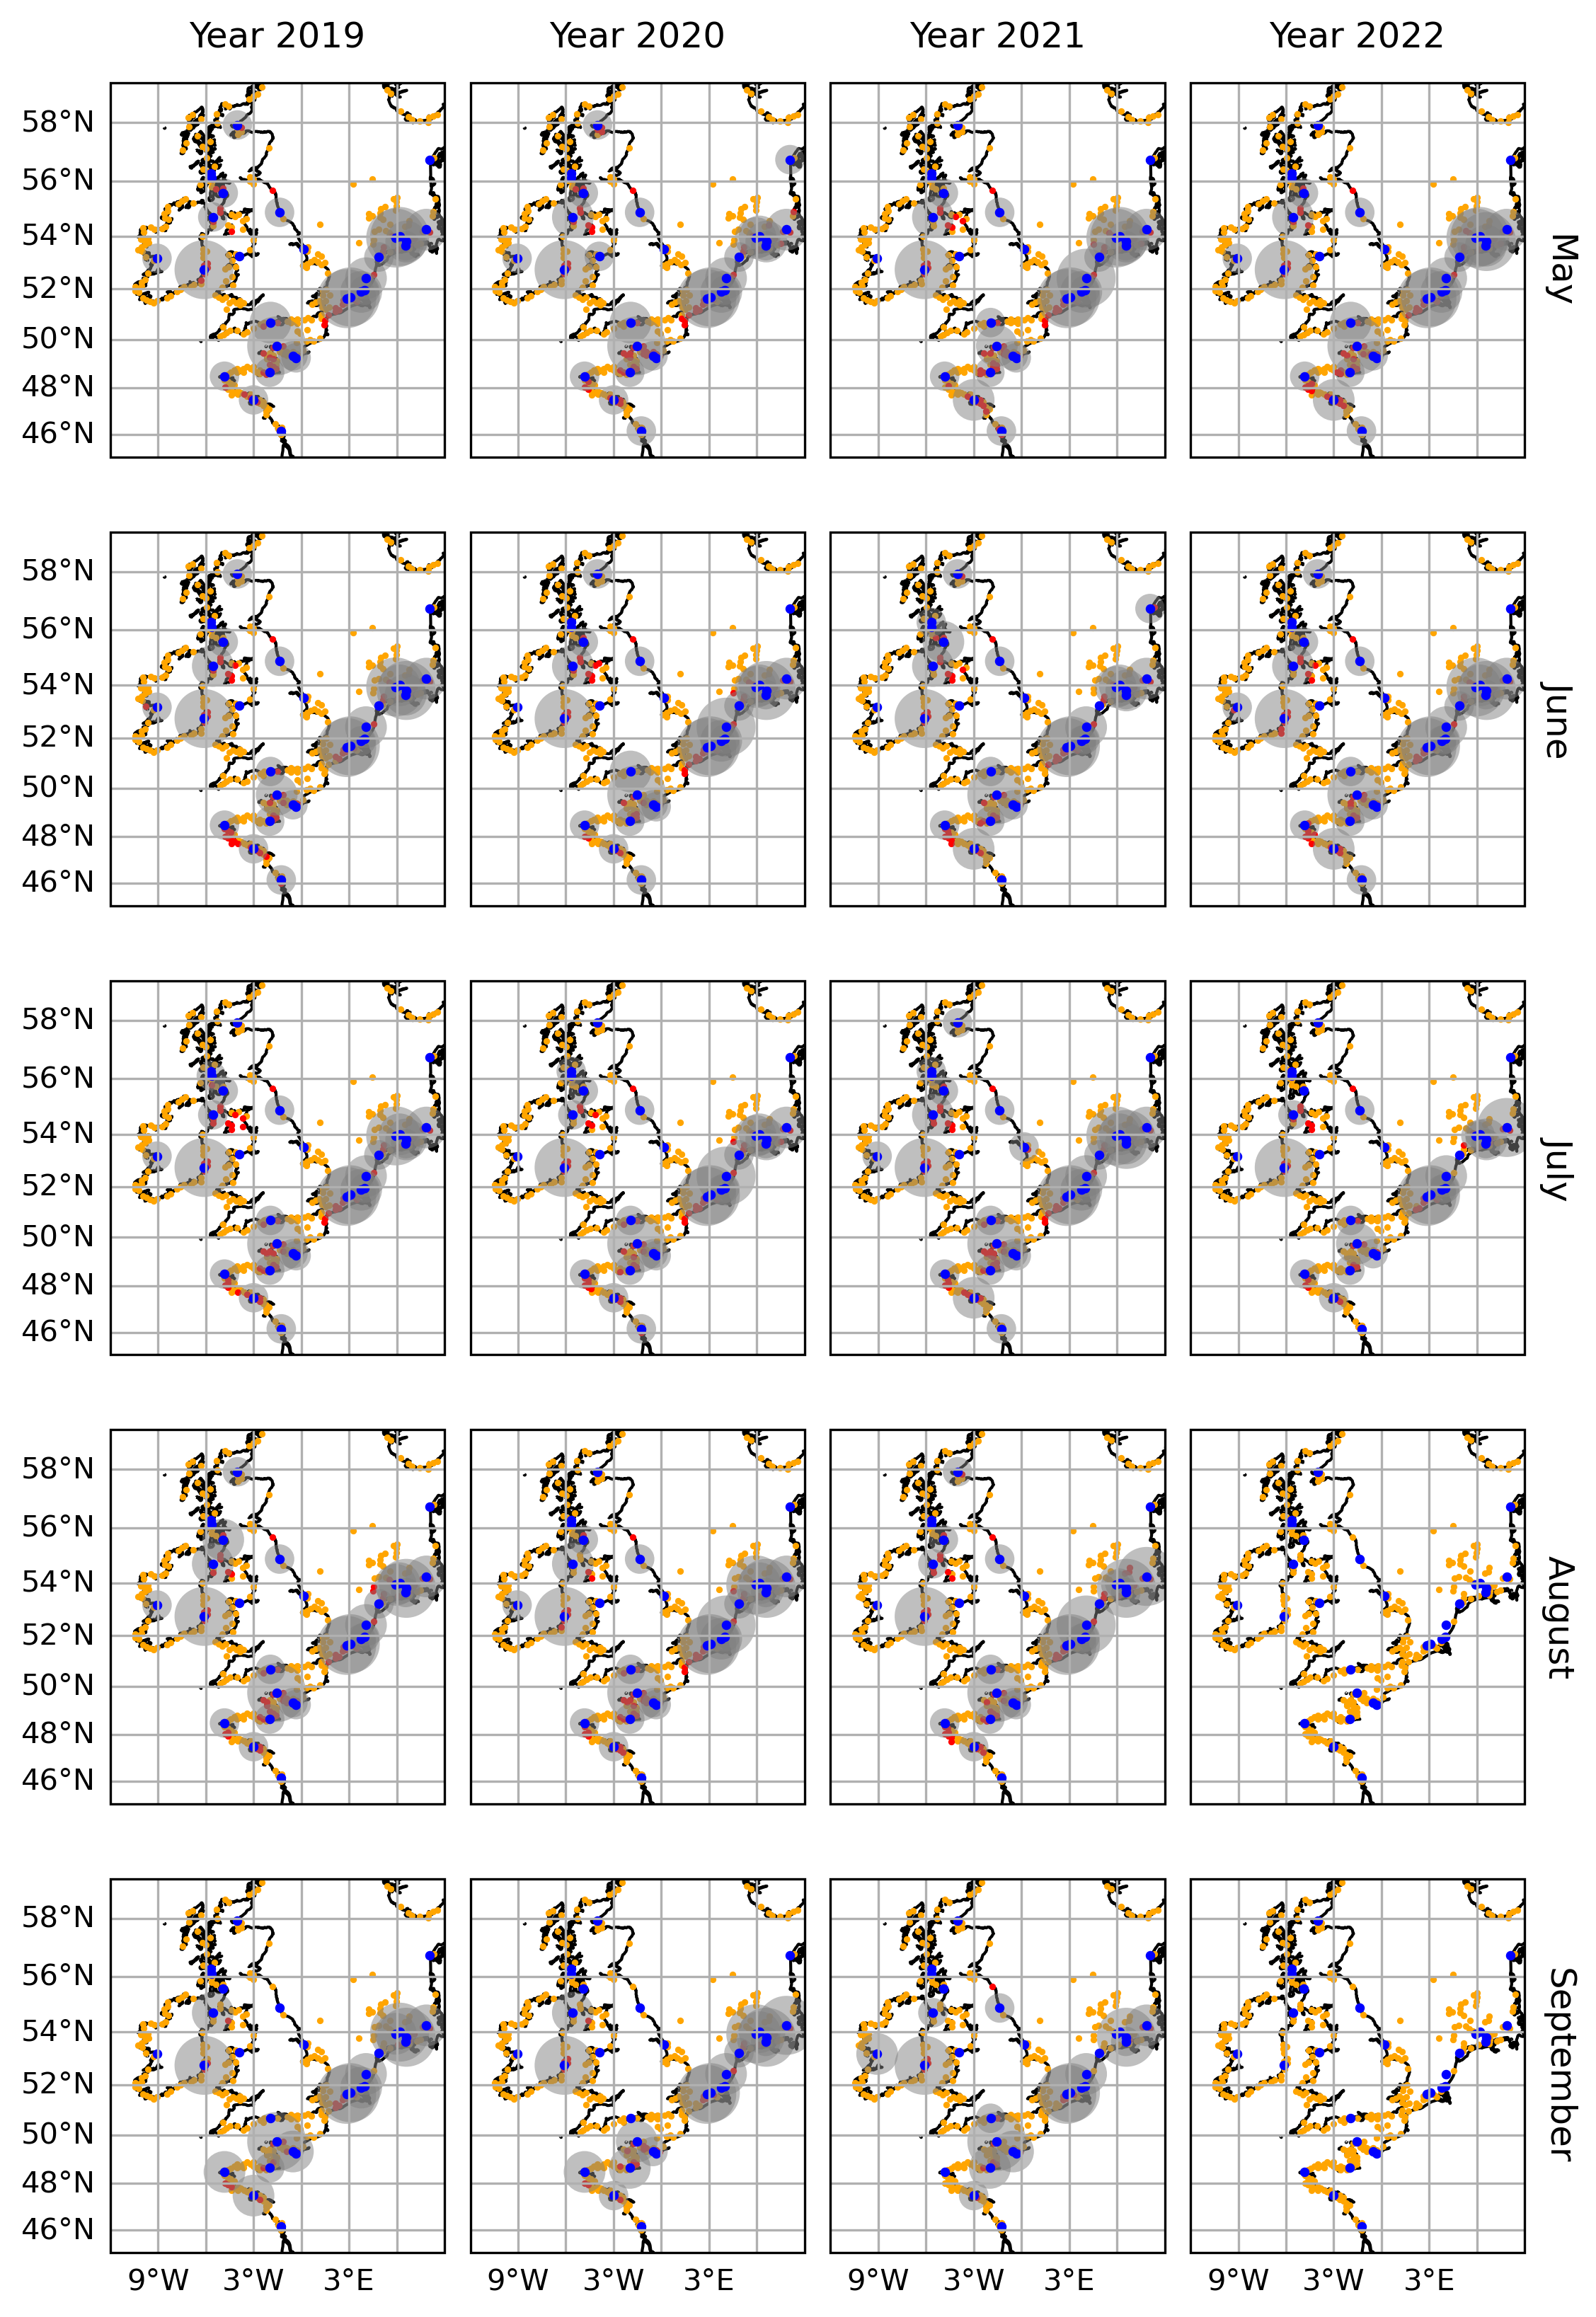

In [68]:
years = ['2019','2020','2021','2022']
months = ['May','June','July','August','September']
num_years = len(years)
num_months = len(months)
fig, axes = plt.subplots(num_months, num_years, 
                         subplot_kw={"projection": cartopy.crs.Mercator()}, 
                         figsize=(10, 14))

fig.set_dpi(300)

fig.patch.set_alpha(0.7)

#loop to make plots for each year and month
for i, year in enumerate(years):
    for j, month in enumerate(months):
        ax = axes [j,i]
        
        ax.coastlines(zorder=0)

        #subset to only plot relative risk for each month&year
        subset = dssaqchis_to_rst_stats_reset[(dssaqchis_to_rst_stats_reset['year'] == year) & (dssaqchis_to_rst_stats_reset['month'] == month)].copy()
        
        subset["rel_pathogen_concentration_category"] *= 100
        
        
        #subset to only plot relevant sources for each month&year
        origin_subset = dssaqchis_origins_01y[(dssaqchis_origins_01y['year'] == year) & (dssaqchis_origins_01y['month'] == month)].copy()

        origin_subset.where(origin_subset["obs_per_origin_area"] == 0).plot.scatter(
            x="lon_hex0", y="lat_hex0", s=1.5, color="orange",
            ax=ax, transform=cartopy.crs.PlateCarree(),
        )

        origin_subset.where(origin_subset["obs_per_origin_area"] > 0).plot.scatter(
            x="lon_hex0", y="lat_hex0", s=1.5, color="red", 
            ax=ax, transform=cartopy.crs.PlateCarree(),
        )

        subset.plot.scatter(
            x="lon", y="lat", s="rel_pathogen_concentration_category",
            alpha=0.5, color="gray", edgecolor='none', 
            ax=ax, transform=cartopy.crs.PlateCarree(),
        )
        
        #add restoration site locations
        known_rst_sites.plot.scatter(
            x="lon_hex0", y="lat_hex0", s=5, 
            color="blue", 
            ax=ax, transform=cartopy.crs.PlateCarree()
        )
        
        #add axes and labels
        ax.set_extent([-12, 9, 45, 59])
        gl = ax.gridlines(draw_labels=False, zorder=0)
        
        if j == num_months - 1 and month == 'September':
            gl.bottom_labels=True
            gl.top_labels=False
            gl.right_labels=False
        else:
            gl.bottom_labels=False
            gl.top_labels=False
            gl.right_labels=False
            
        # Add y-axis labels only to the leftmost column for 2019
        if i == 0 and year == '2019':
            gl.top_labels=False
            gl.right_labels=False
            gl.left_labels=True
        else:
            gl.top_labels=False
            gl.right_labels=False
            gl.left_labels=False

plt.subplots_adjust(right=0.8, bottom=0.15, wspace=0.02) # Adjust the subplot layout
        
#add year and month labels
for i, year in enumerate(years):
    axes[0, i].set_title(f'Year {int(year)}', pad=12, size = 12)
    
for j, month in enumerate(months):
    axes[j, -1].annotate(f'{month}', xy=(1.05, 0.5), xycoords='axes fraction', rotation=270, fontsize=12, ha='left', va='center')
    
#fig.tight_layout();

#save
fig.savefig("plots/041_rest-sites_risk-analsysis_dssaqchis_permonth.pdf")

### Add ocean current vectors to plot

In [22]:
import xarray as xr
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import numpy as np

import xarray as xr
import numpy as np
#import cmocean
from pathlib import Path
from matplotlib import pyplot as plt

In [23]:
#parameters

current_data_path = (
    "/gxfs_work/geomar/smomw529/2022_north-sea_oysters/"
    "data/ocean/MetO-NWS-PHY-hi-CUR/"
)

In [24]:
data_files = sorted(Path(current_data_path).glob("2021/0[5,6,7,8,9]/*.nc"))
print(f"found {len(data_files)} data files")

found 153 data files


In [25]:
%%time

dataset = xr.open_mfdataset(data_files, chunks={"depth": 1, "time": 24})
dataset

CPU times: user 1.15 s, sys: 471 ms, total: 1.62 s
Wall time: 34.3 s


<xarray.Dataset>
Dimensions:  (time: 3672, lat: 1240, lon: 958, depth: 33)
Coordinates:
  * time     (time) datetime64[ns] 2021-05-01T01:00:00 ... 2021-10-01
  * lat      (lat) float32 46.0 46.01 46.03 46.04 ... 62.7 62.72 62.73 62.74
  * lon      (lon) float32 -16.0 -15.97 -15.94 -15.91 ... 12.91 12.94 12.97 13.0
  * depth    (depth) float32 0.0 3.0 5.0 10.0 15.0 ... 2e+03 3e+03 4e+03 5e+03
Data variables:
    uo       (time, depth, lat, lon) float32 dask.array<chunksize=(24, 1, 1240, 958), meta=np.ndarray>
    vo       (time, depth, lat, lon) float32 dask.array<chunksize=(24, 1, 1240, 958), meta=np.ndarray>
Attributes: (12/13)
    title:                hourly-instantaneous horizontal velocity (3D)
    Conventions:          CF-1.7
    source:               PS-OS 45, AMM-FOAM 1.5 km (tidal) NEMO v3.6_WAVEWAT...
    contact:              servicedesk.cmems@mercator-ocean.eu
    netcdf-version-id:    netCDF-4
    references:           http://marine.copernicus.eu/
    ...                   ...
    institution:          UK Met Office
    history:              See source and creation_date attributes
    forcing_data_source:  ECMWF Global Atmospheric Model (HRES); CMEMS-MERCAT...
    product:              NORTHWESTSHELF_ANALYSIS_FORECAST_PHY_004_013
    credit:               E.U. Copernicus Marine Service Information (CMEMS)
    licence:              http://marine.copernicus.eu/services-portfolio/serv...

In [26]:
#select relevant months may-sept for one example year 2021 to later calculate and plot the average
subset = dataset.isel(depth=4).sel(time=dataset['time'].dt.strftime('%Y-%m').isin(['2021-05', '2021-06', '2021-07', '2021-08', '2021-09']))
#subset = dataset.isel(depth=4).sel(time=dataset['time'].dt.strftime('%Y-%m').isin(['2021-05']))
subset

<xarray.Dataset>
Dimensions:  (time: 3671, lat: 1240, lon: 958)
Coordinates:
  * time     (time) datetime64[ns] 2021-05-01T01:00:00 ... 2021-09-30T23:00:00
  * lat      (lat) float32 46.0 46.01 46.03 46.04 ... 62.7 62.72 62.73 62.74
  * lon      (lon) float32 -16.0 -15.97 -15.94 -15.91 ... 12.91 12.94 12.97 13.0
    depth    float32 15.0
Data variables:
    uo       (time, lat, lon) float32 dask.array<chunksize=(24, 1240, 958), meta=np.ndarray>
    vo       (time, lat, lon) float32 dask.array<chunksize=(24, 1240, 958), meta=np.ndarray>
Attributes: (12/13)
    title:                hourly-instantaneous horizontal velocity (3D)
    Conventions:          CF-1.7
    source:               PS-OS 45, AMM-FOAM 1.5 km (tidal) NEMO v3.6_WAVEWAT...
    contact:              servicedesk.cmems@mercator-ocean.eu
    netcdf-version-id:    netCDF-4
    references:           http://marine.copernicus.eu/
    ...                   ...
    institution:          UK Met Office
    history:              See source and creation_date attributes
    forcing_data_source:  ECMWF Global Atmospheric Model (HRES); CMEMS-MERCAT...
    product:              NORTHWESTSHELF_ANALYSIS_FORECAST_PHY_004_013
    credit:               E.U. Copernicus Marine Service Information (CMEMS)
    licence:              http://marine.copernicus.eu/services-portfolio/serv...

In [27]:
subset_day = dataset.isel(depth=4).sel(time='2021-07-01', method = 'nearest')
subset_day

<xarray.Dataset>
Dimensions:  (lat: 1240, lon: 958)
Coordinates:
    time     datetime64[ns] 2021-07-01
  * lat      (lat) float32 46.0 46.01 46.03 46.04 ... 62.7 62.72 62.73 62.74
  * lon      (lon) float32 -16.0 -15.97 -15.94 -15.91 ... 12.91 12.94 12.97 13.0
    depth    float32 15.0
Data variables:
    uo       (lat, lon) float32 dask.array<chunksize=(1240, 958), meta=np.ndarray>
    vo       (lat, lon) float32 dask.array<chunksize=(1240, 958), meta=np.ndarray>
Attributes: (12/13)
    title:                hourly-instantaneous horizontal velocity (3D)
    Conventions:          CF-1.7
    source:               PS-OS 45, AMM-FOAM 1.5 km (tidal) NEMO v3.6_WAVEWAT...
    contact:              servicedesk.cmems@mercator-ocean.eu
    netcdf-version-id:    netCDF-4
    references:           http://marine.copernicus.eu/
    ...                   ...
    institution:          UK Met Office
    history:              See source and creation_date attributes
    forcing_data_source:  ECMWF Global Atmospheric Model (HRES); CMEMS-MERCAT...
    product:              NORTHWESTSHELF_ANALYSIS_FORECAST_PHY_004_013
    credit:               E.U. Copernicus Marine Service Information (CMEMS)
    licence:              http://marine.copernicus.eu/services-portfolio/serv...

In [28]:
subset_month = dataset.isel(depth=4).sel(time='2021-07')
subset_month

<xarray.Dataset>
Dimensions:  (time: 744, lat: 1240, lon: 958)
Coordinates:
  * time     (time) datetime64[ns] 2021-07-01 ... 2021-07-31T23:00:00
  * lat      (lat) float32 46.0 46.01 46.03 46.04 ... 62.7 62.72 62.73 62.74
  * lon      (lon) float32 -16.0 -15.97 -15.94 -15.91 ... 12.91 12.94 12.97 13.0
    depth    float32 15.0
Data variables:
    uo       (time, lat, lon) float32 dask.array<chunksize=(1, 1240, 958), meta=np.ndarray>
    vo       (time, lat, lon) float32 dask.array<chunksize=(1, 1240, 958), meta=np.ndarray>
Attributes: (12/13)
    title:                hourly-instantaneous horizontal velocity (3D)
    Conventions:          CF-1.7
    source:               PS-OS 45, AMM-FOAM 1.5 km (tidal) NEMO v3.6_WAVEWAT...
    contact:              servicedesk.cmems@mercator-ocean.eu
    netcdf-version-id:    netCDF-4
    references:           http://marine.copernicus.eu/
    ...                   ...
    institution:          UK Met Office
    history:              See source and creation_date attributes
    forcing_data_source:  ECMWF Global Atmospheric Model (HRES); CMEMS-MERCAT...
    product:              NORTHWESTSHELF_ANALYSIS_FORECAST_PHY_004_013
    credit:               E.U. Copernicus Marine Service Information (CMEMS)
    licence:              http://marine.copernicus.eu/services-portfolio/serv...

In [29]:
intensity = np.sqrt(u**2 + v**2)

NameError: name 'u' is not defined

In [ ]:
# 01.07.2021 
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(
    1, 2,
    # subplot_kw={"projection": cartopy.crs.Stereographic(
    #     central_longitude=ds_conn.hex_proj__lon_origin,
    #     central_latitude=ds_conn.hex_proj__lat_origin,
    # )},
    subplot_kw={"projection": cartopy.crs.PlateCarree()},
    figsize=(10, 6.26),
)

fig.set_dpi(300)

ax[1].coastlines(zorder=0)
# ax[1].add_feature(cartopy.feature.LAND)
# ax[1].add_feature(cartopy.feature.BORDERS)
ax[0].coastlines(zorder=0)
# ax[0].add_feature(cartopy.feature.LAND)
# ax[0].add_feature(cartopy.feature.BORDERS)

ax[0].set_title("number of diseased source populations")
ax[0].set_extent([-12, 9, 46, 60])
gl0 = ax[0].gridlines(draw_labels=True, zorder=0)
gl0.top_labels=False   # suppress top labels
gl0.right_labels=False # suppress right labels;

ax[1].set_title("normalized pathogen concentration")
ax[1].set_extent([-12, 9, 46, 60])
gl1 = ax[1].gridlines(draw_labels=True, zorder=0);
gl1.top_labels=False   # suppress top labels
gl1.right_labels=False # suppress right labels;


#add current velocity and direction vectors

u = subset_day.uo.squeeze()
v = subset_day.vo.squeeze()

# Adjust the length and width of the arrows based on intensity
#scale_factor = 0.1  # Adjust this factor to control the arrow size
#u_scaled = u * scale_factor
#v_scaled = v * scale_factor

lon, lat = np.meshgrid(subset.lon.values, subset.lat.values)

# Define a slice to skip drawing some of the quiver arrows to reduce clutter
skip = (slice(None, None, 15), slice(None, None, 15))

# Use the quiver function to display current vectors with their direction and intensity
#fig.quiver(lon[skip], lat[skip], u_scaled[skip], v_scaled[skip], color='black', latlon=True, scale=2, width=0.003, headwidth=4)

q1 = ax[0].quiver(lon[skip], lat[skip], u[skip], v[skip], color='black', width=0.003, headwidth=2)
q2 = ax[1].quiver(lon[skip], lat[skip], u[skip], v[skip], color='black', width=0.003, headwidth=2)

_dss_to_rst_stats = dss_to_rst_stats.copy()

_dss_to_rst_stats["rel_num_dss_sources_category"] *= 100
_dss_to_rst_stats["rel_pathogen_concentration_category"] *= 100

_dss_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_num_dss_sources_category",
    alpha=0.5, color="gray",
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

_dss_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_pathogen_concentration_category",
    alpha=0.5, color="gray",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange", zorder=1,
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red", zorder=1,
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue", zorder=1,
    ax=ax[0], transform=cartopy.crs.PlateCarree()
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",zorder=1,
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red", zorder=1,
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue", zorder=1,
    ax=ax[1], transform=cartopy.crs.PlateCarree()
)

# Add quiver keys to each subplot with a valid labelpos
ax[0].quiverkey(q1, 0.47, 0.3, 1, r'$1 \frac{m}{s}$', labelpos='W', coordinates='figure')
ax[1].quiverkey(q2, 0.96 , 0.3, 1, r'$1 \frac{m}{s}$', labelpos='W', coordinates='figure')


#fig.patch.set_alpha(0.7)

fig.tight_layout();

fig.savefig("plots/041_rest-sites_risk-analsysis_velocity_01july2021.pdf")


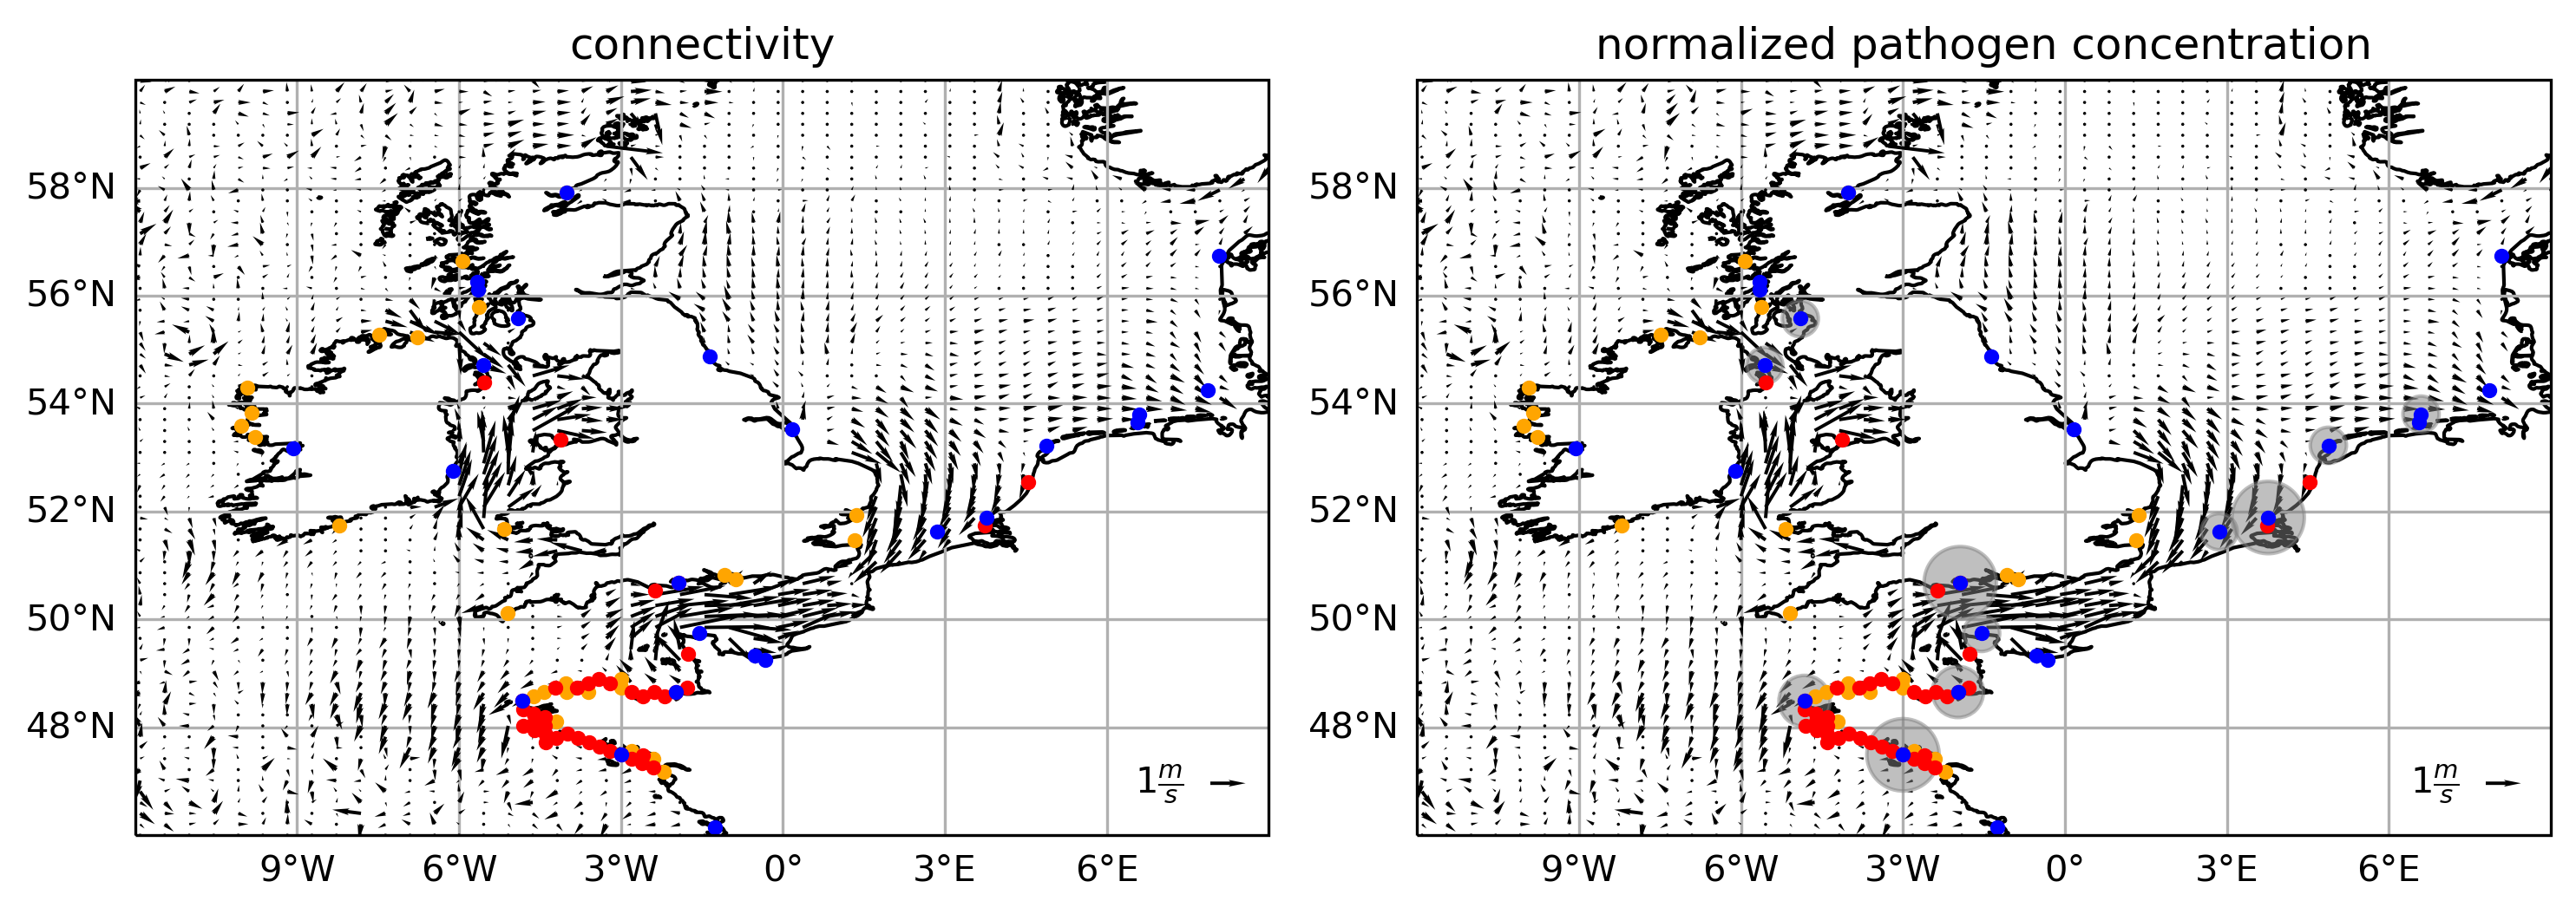

In [25]:
#01.07.2021 version for Arne & Julia

# 01.07.2021 
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(
    1, 2,
    # subplot_kw={"projection": cartopy.crs.Stereographic(
    #     central_longitude=ds_conn.hex_proj__lon_origin,
    #     central_latitude=ds_conn.hex_proj__lat_origin,
    # )},
    subplot_kw={"projection": cartopy.crs.PlateCarree()},
    figsize=(10, 6.26),
)

fig.set_dpi(300)

ax[0].coastlines(zorder=0)
ax[1].coastlines(zorder=0)

ax[0].set_title("connectivity")
ax[0].set_extent([-12, 9, 46, 60])
gl0 = ax[0].gridlines(draw_labels=True, zorder=0)
gl0.top_labels=False   # suppress top labels
gl0.right_labels=False # suppress right labels;

ax[1].set_title("normalized pathogen concentration")
ax[1].set_extent([-12, 9, 46, 60])
gl1 = ax[1].gridlines(draw_labels=True, zorder=0);
gl1.top_labels=False   # suppress top labels
gl1.right_labels=False # suppress right labels;

#add current velocity and direction vectors

u = subset_day.uo.squeeze()
v = subset_day.vo.squeeze()

# Adjust the length and width of the arrows based on intensity
#scale_factor = 0.1  # Adjust this factor to control the arrow size
#u_scaled = u * scale_factor
#v_scaled = v * scale_factor

lon, lat = np.meshgrid(subset.lon.values, subset.lat.values)

# Define a slice to skip drawing some of the quiver arrows to reduce clutter
skip = (slice(None, None, 15), slice(None, None, 15))

# Use the quiver function to display current vectors with their direction and intensity
#fig.quiver(lon[skip], lat[skip], u_scaled[skip], v_scaled[skip], color='black', latlon=True, scale=2, width=0.003, headwidth=4)

q1 = ax[0].quiver(lon[skip], lat[skip], u[skip], v[skip], color='black', width=0.003, headwidth=2)
q2 = ax[1].quiver(lon[skip], lat[skip], u[skip], v[skip], color='black', width=0.003, headwidth=2)

_dss_to_rst_stats = dss_to_rst_stats.copy()

_dss_to_rst_stats["rel_num_dss_sources_category"] *= 100
_dss_to_rst_stats["rel_pathogen_concentration_category"] *= 100

_dss_to_rst_stats.plot.scatter(
    x="lon", y="lat", s="rel_pathogen_concentration_category",
    alpha=0.5, color="gray",
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange", zorder=1,
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red", zorder=1,
    ax=ax[0], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue", zorder=1,
    ax=ax[0], transform=cartopy.crs.PlateCarree()
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] == 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="orange",zorder=1,
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

dss_origins_01y.where(dss_origins_01y["obs_per_origin_area"] > 0).plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, color="red", zorder=1,
    ax=ax[1], transform=cartopy.crs.PlateCarree(),
)

known_rst_sites.plot.scatter(
    x="lon_hex0", y="lat_hex0", s=10, 
    color="blue", zorder=1,
    ax=ax[1], transform=cartopy.crs.PlateCarree()
)

# Add quiver keys to each subplot with a valid labelpos
ax[0].quiverkey(q1, 0.47, 0.3, 1, r'$1 \frac{m}{s}$', labelpos='W', coordinates='figure')
ax[1].quiverkey(q2, 0.96 , 0.3, 1, r'$1 \frac{m}{s}$', labelpos='W', coordinates='figure')


#fig.patch.set_alpha(0.7)

fig.tight_layout();

fig.savefig("plots/041_rest-sites_risk-analsysis_velocity_01july2021_OHmeeting.pdf")